<h1><center> Crime Analytics in Singapore</center></h1>



In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

<h1> Introduction </h1>

Singapore is known to be one of the safest countries in the world. However, that does not insist there are no crimes. We will be leveraging python to identify few important patterns and Goals.

<b> Goals </b>

1) To analyse the various and top crimes that have occured over the past few years

2) To pinpoint any increasing trends of crimes with digitalization

3) To figure out any decreasing crimes due to efforts that have been rolled out

4) To analyse any crimes of concern that could harm the safety and security of Singapore

5) To map out areas/neighbourhoods of concern and to figure out why such areas occur on a higher/lower scale in a particular neighbourhood

<b> We will start our project by analysing crime trends over the past 30 years </b>

In [ ]:
crime_classification=pd.read_csv("../crime analytics dataset copy (SCHOOL COPY)/overall-crime-cases-recorded-by-crime-classification.csv")

total_crimes=crime_classification.groupby(['year']).sum()  #grouping by year

total_crimes.info()

In [418]:
total_crimes.reset_index(inplace=True) #resetting index to have a cohesive dataset

<b> Obtaining data for the last 10 years </b>

In [419]:
total_crimes_ten_years=total_crimes.iloc[22:33]

total_crimes_ten_years.head(2)

,year,value
22,2008,33113
23,2009,33186


<b> Conversion of Year column from int into year </b>

In [ ]:
total_crimes_ten_years.year=pd.to_datetime(total_crimes_ten_years.year,format='%Y').dt.strftime('%Y')

total_crimes_ten_years.year=pd.to_datetime(total_crimes_ten_years.year,format='%Y').dt.strftime('%Y')

<h2> Visualization of Crime Rates Over the Last 10 Years </h2>

Text(0, 0.5, 'Number of Crimes')

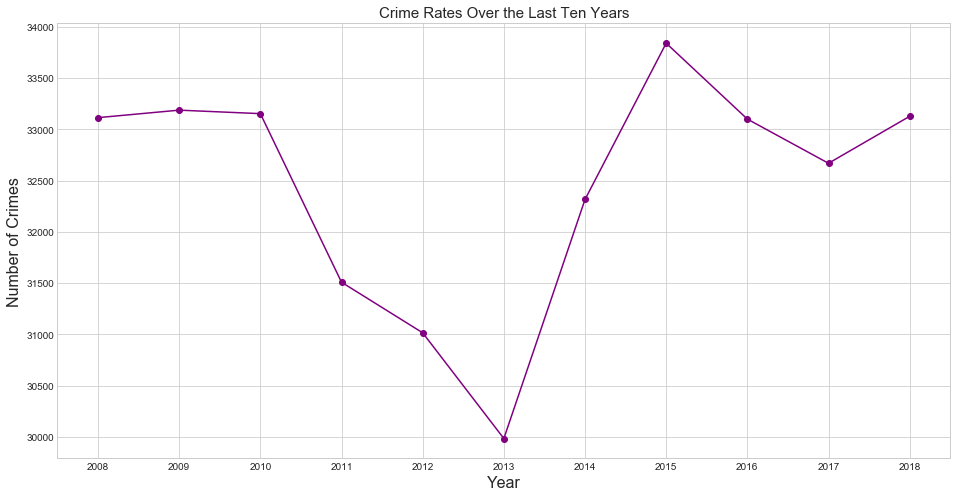

In [421]:
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(16,8))

plt.plot(total_crimes_ten_years.year,total_crimes_ten_years.value,color='purple',marker='o')

plt.title('Crime Rates Over the Last Ten Years',fontsize=15)

plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of Crimes',fontsize=16)



<b> Observation </b>

We can observe that there has been a decreasing trend of crimes from 2008 to 2018 with a sudden
increase in crimes since. Despite the figure, the difference of crimes are merely in thousands with
the lowest crime recorded being 30000 in 2013 and highest ~33500 in 2015

<h2> Crime Rate per 100 000 Population </h2>

We will now look into the datasets comparing crimes per 100 000 population to provide us with a better picture

In [422]:
crime_per_100000_population=pd.read_csv("../crime analytics dataset copy (SCHOOL COPY)/overall-crime-rate-by-crime-classification.csv")

crime_per_100000_population.year=crime_per_100000_population.year.map(str).map(int)
crime_per_100000_population.year=pd.to_datetime(crime_per_100000_population.year,format='%Y').dt.strftime('%Y')




In [423]:
crime_per_100000_population.describe() #describing of data

,value
count,198.000000
mean,154.565657
std,217.671930
min,4.000000
25%,49.500000
50%,81.000000
75%,118.750000
max,1010.000000


In [426]:
crime_per_100000_population.columns=['Year','Level','Types of Crime','Number of Crimes']

crime_per_100000_population['Types of Crime'].unique()

crime_per_100000_population['Year']=crime_per_100000_population['Year'].map(int)

#mapping of 'Year' to int to obtain dates from 2008 to 2018

array(['Crimes Against Persons', 'Violent / Serious Property Crimes',
       'Housebreaking And Related Crimes', 'Theft And Related Crimes',
       'Commercial Crimes', 'Miscellaneous Crimes'], dtype=object)

<b> Since we only want to analyse data in the last 10 years, we remove the data before
the year 2008 </b>

In [428]:
crime_per_100000_population_edited=crime_per_100000_population[crime_per_100000_population.loc[:,'Year']>=2008]

In [429]:
crime_type_df=crime_per_100000_population_edited.groupby(['Types of Crime']).sum()['Number of Crimes'].sort_values(ascending=False)
crime_type_df

#theft and relatec crimes??

Types of Crime
Theft And Related Crimes             3519
Commercial Crimes                    1153
Miscellaneous Crimes                  959
Crimes Against Persons                861
Housebreaking And Related Crimes      123
Violent / Serious Property Crimes      97
Name: Number of Crimes, dtype: int64

In [430]:
crime_type_df=crime_type_df.to_frame()
crime_type_df=crime_type_df.reset_index()


<h2> Top Crimes Over the Last 10 Years </h2>

Text(0, 0.5, 'Number of Crimes Committed')

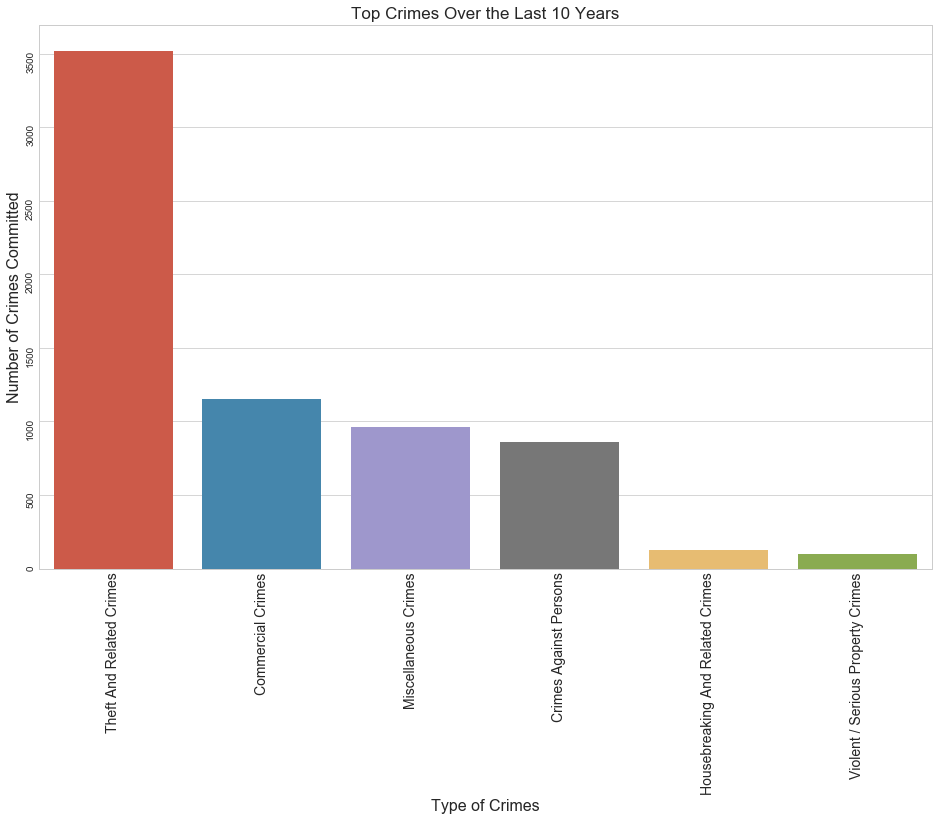

In [432]:
#crime_type_df
ax1,fig=plt.subplots(figsize=(16,10))

ax1=sns.barplot(x='Types of Crime',y='Number of Crimes',data=crime_type_df)


plt.xticks(rotation=90,fontsize=14)
plt.yticks(rotation=90)

plt.title('Top Crimes Over the Last 10 Years',fontsize=17)
ax1.set_xlabel('Type of Crimes',fontsize=16)
ax1.set_ylabel('Number of Crimes Committed',fontsize=16)

<b> Observation </b>

From our observation, we observe that the highest crime rate over the last 10 years is 
theft and related crimes followed by commerical crimes.


We could now create a heatmap to observe the trends in crimes over the last 10 years


<h2> Heatmap of Crimes</h2>

In [433]:
crime_per_100000_population_edited.pivot('Types of Crime','Year','Number of Crimes')

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Types of Crime,,,,,,,,,,,
Commercial Crimes,72,67,75,75,66,73,104,152,150,152,167
Crimes Against Persons,81,78,82,77,72,71,78,75,78,80,89
Housebreaking And Related Crimes,19,21,18,14,11,10,7,6,5,6,6
Miscellaneous Crimes,81,74,82,81,79,77,87,91,101,101,105
Theft And Related Crimes,412,410,385,353,348,316,306,282,252,239,216
Violent / Serious Property Crimes,20,15,11,9,7,8,10,5,4,4,4


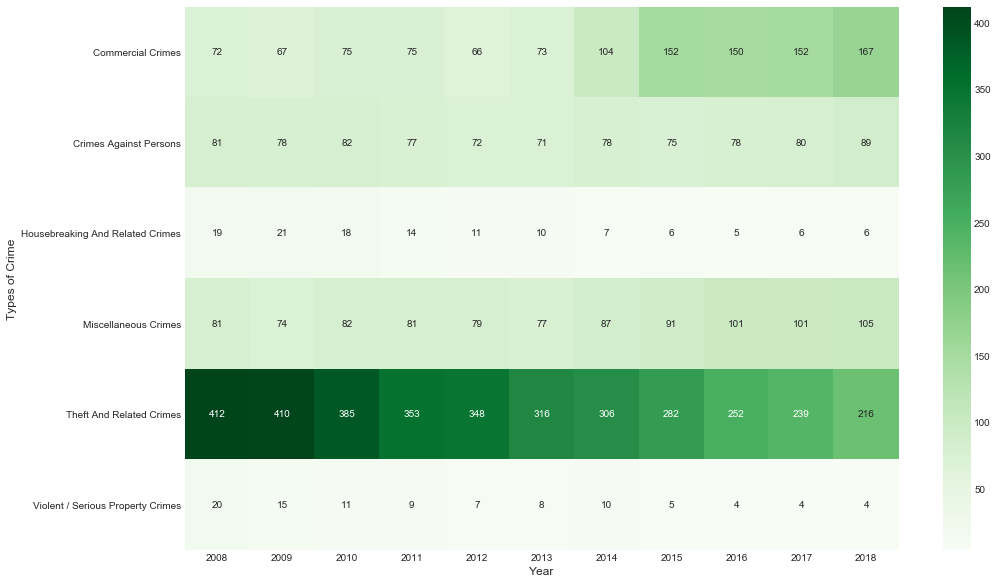

In [436]:
ax1,fig=plt.subplots(figsize=(16,10))

ax1=sns.heatmap(crime_per_100000_population_edited.pivot('Types of Crime','Year','Number of Crimes'),cmap='Greens'
           ,annot=True,fmt='d')



<b> From this heatmap, we can observe that though theft and related crimes constitute the highest numbers, they are decreasing on a constant scale. We will dwelve deeper into
the types of crimes by highest numbers soon.</b>


In [437]:
crime_agegroup=pd.read_csv("../crime analytics dataset copy (SCHOOL COPY)/persons-arrested-for-selected-major-offences-by-age-group.csv")


crime_agegroup.columns=['Year','Types of Crime based on gender','Age','No of Crimes']

crime_agegroup.isnull().sum()

Year                              0
Types of Crime based on gender    0
Age                               0
No of Crimes                      0
dtype: int64

<b> Conversion to datetime </b>

In [438]:
crime_agegroup.Year=crime_agegroup.Year.map(str).map(int)

crime_agegroup.Year=pd.to_datetime(crime_agegroup.Year,format='%Y').dt.strftime('%Y')

When we try to figure out the missing values, we note that it is zero. But through
eyeballing, we did notice that there were a few missing data. However, when coding to find out missing data, we observed zero values. 

Using .str.contains('na), we were able to locate the missing values

In [439]:
crime_agegroup[crime_agegroup['No of Crimes'].str.contains('na')].count()

Year                              60
Types of Crime based on gender    60
Age                               60
No of Crimes                      60
dtype: int64

In [440]:
crime_agegroup[crime_agegroup['No of Crimes'].str.contains('na')].shape

(60, 4)

<b> From observing our data, we notice that two of the columns overlap: </b>

1) 21 years Old and Below <br>
2) Youths (7 to 19) years old

For e.g: If 10 people aged 7 to 19 committed a crime. They will be labelled as both
7 to 19 years old and also 21 years old and below. This provides us with overlap of data. When you subtract the values, you observe crimes committed at 20 and 21 years of age.

<b> What can we do </b>:

Obtain the crimes committed at 20/21 years old and add it to the column of Youths (7 to 19) years old since any individual is considered an adult at 21 years of age. The reason we perform this instead of taking 21 years and below as our data is due to the fact that some datasets show 'na' in the columns of 21 years and below yet have some number in the youth(7 to 19 years old) section. We perform this to reduce the number of rows and to have a cleaner dataset with less na values

In [441]:
#obtaining crimes committed by individuals 21 years and below

underage_crime=crime_agegroup.loc[(crime_agegroup.Age=='21 Years Old And Below') |(crime_agegroup.Age=='Youths (7 To 19 Years Old)')]

underage_crime.head(10)


,Year,Types of Crime based on gender,Age,No of Crimes
1,2008,Total Persons Arrested For Murder,21 Years Old And Below,na
2,2008,Total Persons Arrested For Murder,Youths (7 To 19 Years Old),8
4,2008,Male Arrested For Murder,21 Years Old And Below,na
5,2008,Male Arrested For Murder,Youths (7 To 19 Years Old),6
7,2008,Female Arrested For Murder,21 Years Old And Below,na
8,2008,Female Arrested For Murder,Youths (7 To 19 Years Old),2
10,2008,Total Persons Arrested For Rape,21 Years Old And Below,na
11,2008,Total Persons Arrested For Rape,Youths (7 To 19 Years Old),16
13,2008,Male Arrested For Rape,21 Years Old And Below,na
14,2008,Male Arrested For Rape,Youths (7 To 19 Years Old),16


<b> Since we will be performing mathematical operation, we will convert the na values to 0 </b>

In [ ]:
underage_crime['No of Crimes']=underage_crime['No of Crimes'].replace('na',0)

underage_crime['No of Crimes']=underage_crime['No of Crimes'].map(int)

<b> Number of crimes committed by youth (7 to 19) years old </b>

In [444]:
youth_7_19=underage_crime['No of Crimes'][1::2] 
youth_7_19

2        8
5        6
8        2
11      16
14      16
      ... 
977     25
980      9
983    217
986    141
989     76
Name: No of Crimes, Length: 330, dtype: int64

<b> Number of Crimes committed by youth 21 years old and below </b>

In [445]:
youth_21=underage_crime['No of Crimes'][0::2]
youth_21

1        0
4        0
7        0
10       0
13       0
      ... 
976     46
979     13
982    328
985    221
988    107
Name: No of Crimes, Length: 330, dtype: int64

In [446]:
#concat both dataframes to obtain a youth dataframe

youth=pd.concat([youth_7_19.reset_index(),youth_21.reset_index()],axis=1)

youth=youth.drop(columns='index')
#['Youth from 17 to 19 years old ','Youth under 21']
youth.head()

,No of Crimes,No of Crimes
0,8,0
1,6,0
2,2,0
3,16,0
4,16,0


<b> Column two represents the total crimes committed by under 21 and while column 1 represents the youth. It makes sense
for us to subtract the total crimes committed by 21 year olds with the youth column </b>

In [447]:
youth.columns=['column1','column2']  
twenty_twentyone_crime=youth.apply(lambda x:x['column2']-x['column1'],axis=1)  #these are the 20/21 year olds that have committed crimes
twenty_twentyone_crime

0       -8
1       -6
2       -2
3      -16
4      -16
      ... 
325     21
326      4
327    111
328     80
329     31
Length: 330, dtype: int64

<b> The above values provide us with the data of individuals aged 20/21 committing crimes in Singapore. We can observe
that there are negative values which does not make sense. The negative values indicate 
that zero individuals ages 20/21 committed any such crimes. We will comvert the negative values into positive </b>

In [448]:
twenty_twentyone_crime[twenty_twentyone_crime<0]=0
twenty_twentyone_crime

0        0
1        0
2        0
3        0
4        0
      ... 
325     21
326      4
327    111
328     80
329     31
Length: 330, dtype: int64

<b> So we add them to the obtained values under the youth(7 to 19 years old) and rename columns into youth (21 years and below) </b>

In [449]:
y=crime_agegroup[crime_agegroup['Age']=='Youths (7 To 19 Years Old)']['No of Crimes'].map(str).map(int)
y.head()  #represents individuals aged 21 and below

2      8
5      6
8      2
11    16
14    16
Name: No of Crimes, dtype: int64

In [450]:
y=y.reset_index()['No of Crimes'] #resetting index due to mismatch of indexes
y

0        8
1        6
2        2
3       16
4       16
      ... 
325     25
326      9
327    217
328    141
329     76
Name: No of Crimes, Length: 330, dtype: int64

<b> Now we will add twenty_twentyone_crime which are crimes committed by 20 and 21 year olds with y which is the crime
committed by 7 to 19 years old. The result will give us with the total crimes committed by individuals 21 and under. </b>

In [451]:
twentyone_and_under=twenty_twentyone_crime+y
twentyone_and_under  #21 and under (new)

0        8
1        6
2        2
3       16
4       16
      ... 
325     46
326     13
327    328
328    221
329    107
Length: 330, dtype: int64

In [452]:
crime_agegroup[1::3].reset_index() #obtaining ages of 21 and above

,index,Year,Types of Crime based on gender,Age,No of Crimes
0,1,2008,Total Persons Arrested For Murder,21 Years Old And Below,na
1,4,2008,Male Arrested For Murder,21 Years Old And Below,na
2,7,2008,Female Arrested For Murder,21 Years Old And Below,na
3,10,2008,Total Persons Arrested For Rape,21 Years Old And Below,na
4,13,2008,Male Arrested For Rape,21 Years Old And Below,na
...,...,...,...,...,...
325,976,2018,Male Arrested For Serious Hurt,21 Years Old And Below,46
326,979,2018,Female Arrested For Serious Hurt,21 Years Old And Below,13
327,982,2018,Total Persons Arrested For Cheating & Related,21 Years Old And Below,328
328,985,2018,Male Arrested For Cheating & Related,21 Years Old And Below,221


In [453]:
under_21_original=crime_agegroup[1::3].reset_index()

In [457]:
 #gives us data for crimes committed by kids under 21 from the original data

final_under_21=pd.concat([under_21_original,twentyone_and_under],axis=1)
final_under_21.rename(columns={0:'Crimes Committed'},inplace=True)
final_under_21.drop(columns=['No of Crimes'],inplace=True)

final_under_21.set_index('index',inplace=True)
final_under_21  #crimes committed by individuals under 21 years of age

,Year,Types of Crime based on gender,Age,Crimes Committed
index,,,,
1,2008,Total Persons Arrested For Murder,21 Years Old And Below,8
4,2008,Male Arrested For Murder,21 Years Old And Below,6
7,2008,Female Arrested For Murder,21 Years Old And Below,2
10,2008,Total Persons Arrested For Rape,21 Years Old And Below,16
13,2008,Male Arrested For Rape,21 Years Old And Below,16
...,...,...,...,...
976,2018,Male Arrested For Serious Hurt,21 Years Old And Below,46
979,2018,Female Arrested For Serious Hurt,21 Years Old And Below,13
982,2018,Total Persons Arrested For Cheating & Related,21 Years Old And Below,328


In [458]:
final_under_21.head()  

#now we have obtained datasets for crimes committed by under 21's after integration
#and dropping columns of 21 and below. We also renamed columns of '7 to 19 years old' to
#'21 Years old and Below'


,Year,Types of Crime based on gender,Age,Crimes Committed
index,,,,
1,2008,Total Persons Arrested For Murder,21 Years Old And Below,8
4,2008,Male Arrested For Murder,21 Years Old And Below,6
7,2008,Female Arrested For Murder,21 Years Old And Below,2
10,2008,Total Persons Arrested For Rape,21 Years Old And Below,16
13,2008,Male Arrested For Rape,21 Years Old And Below,16


<b> Crimes committed by individuals above 21 years old </b>

In [459]:
#Now we will deal with datasets of columns above 21 years old

above_21=crime_agegroup[0::3].rename(columns={'No of Crimes':'Crimes Committed'})  #rename columns to they match 
                                                                                   #final under_21 dataframe
above_21

,Year,Types of Crime based on gender,Age,Crimes Committed
0,2008,Total Persons Arrested For Murder,Above 21 Years Old,na
3,2008,Male Arrested For Murder,Above 21 Years Old,na
6,2008,Female Arrested For Murder,Above 21 Years Old,na
9,2008,Total Persons Arrested For Rape,Above 21 Years Old,na
12,2008,Male Arrested For Rape,Above 21 Years Old,na
...,...,...,...,...
975,2018,Male Arrested For Serious Hurt,Above 21 Years Old,310
978,2018,Female Arrested For Serious Hurt,Above 21 Years Old,42
981,2018,Total Persons Arrested For Cheating & Related,Above 21 Years Old,2225
984,2018,Male Arrested For Cheating & Related,Above 21 Years Old,1523


In [460]:
above_21.reset_index(inplace=True)
above_21.set_index('index',inplace=True)

In [461]:
above_21

,Year,Types of Crime based on gender,Age,Crimes Committed
index,,,,
0,2008,Total Persons Arrested For Murder,Above 21 Years Old,na
3,2008,Male Arrested For Murder,Above 21 Years Old,na
6,2008,Female Arrested For Murder,Above 21 Years Old,na
9,2008,Total Persons Arrested For Rape,Above 21 Years Old,na
12,2008,Male Arrested For Rape,Above 21 Years Old,na
...,...,...,...,...
975,2018,Male Arrested For Serious Hurt,Above 21 Years Old,310
978,2018,Female Arrested For Serious Hurt,Above 21 Years Old,42
981,2018,Total Persons Arrested For Cheating & Related,Above 21 Years Old,2225


In [462]:
crime_agegroup[0::3].head(2)

,Year,Types of Crime based on gender,Age,No of Crimes
0,2008,Total Persons Arrested For Murder,Above 21 Years Old,na
3,2008,Male Arrested For Murder,Above 21 Years Old,na


In [463]:
above_21.head()

,Year,Types of Crime based on gender,Age,Crimes Committed
index,,,,
0,2008,Total Persons Arrested For Murder,Above 21 Years Old,na
3,2008,Male Arrested For Murder,Above 21 Years Old,na
6,2008,Female Arrested For Murder,Above 21 Years Old,na
9,2008,Total Persons Arrested For Rape,Above 21 Years Old,na
12,2008,Male Arrested For Rape,Above 21 Years Old,na


In [464]:
final_under_21.head()

,Year,Types of Crime based on gender,Age,Crimes Committed
index,,,,
1,2008,Total Persons Arrested For Murder,21 Years Old And Below,8
4,2008,Male Arrested For Murder,21 Years Old And Below,6
7,2008,Female Arrested For Murder,21 Years Old And Below,2
10,2008,Total Persons Arrested For Rape,21 Years Old And Below,16
13,2008,Male Arrested For Rape,21 Years Old And Below,16


In [465]:
crime_agegroup_final=pd.concat([final_under_21,above_21],axis=0).sort_index()


In [466]:
crime_agegroup_final=crime_agegroup_final.sort_index()

<b> we finally have the cleaned data of crimes committed by above and under 21 year olds </b>

In [4543]:
crime_agegroup_final  #we will now use this dataframe which contains above and below 21 year olds

,Year,Types of Crime based on gender,Age,Crimes Committed
index,,,,
0,2008,Total Persons Arrested For Murder,Above 21 Years Old,na
1,2008,Total Persons Arrested For Murder,21 Years Old And Below,8
3,2008,Male Arrested For Murder,Above 21 Years Old,na
4,2008,Male Arrested For Murder,21 Years Old And Below,6
6,2008,Female Arrested For Murder,Above 21 Years Old,na
...,...,...,...,...
982,2018,Total Persons Arrested For Cheating & Related,21 Years Old And Below,328
984,2018,Male Arrested For Cheating & Related,Above 21 Years Old,1523
985,2018,Male Arrested For Cheating & Related,21 Years Old And Below,221


<b> We have been able to successfully reduce the number of rows from 990 to 660 </b>


Now we do observe that there are columns with 'na' values under the above 21 years old column. We will 
replace 'na' values in the Above 21 Years olf column with 0

In [468]:
crime_agegroup_final['Crimes Committed']=crime_agegroup_final['Crimes Committed'].replace('na',0)
crime_agegroup_final['Crimes Committed']=crime_agegroup_final['Crimes Committed'].map(int)  #above 21 was in object so we did this. Try to bring it up

In [469]:
crime_agegroup_final_to_plot=crime_agegroup_final.groupby(['Year','Age'])['Crimes Committed'].sum().drop('2008')

In [470]:
crime_agegroup_final_to_plot=crime_agegroup_final_to_plot.to_frame()


In [471]:
crime_agegroup_final_to_plot=crime_agegroup_final_to_plot.reset_index() #resetting index for plotting

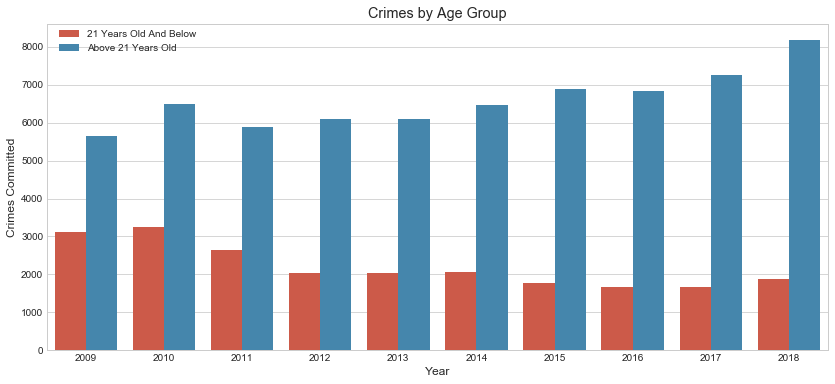

In [479]:
fig, ax = plt.subplots(figsize=(14,6))

sns.barplot(x='Year',y='Crimes Committed', hue='Age',data=crime_agegroup_final_to_plot)

plt.title('Crimes by Age Group')
plt.legend(loc=[0.01,0.9])

<b> Observation </b>

From this visualization, it is noted that the crime committed by individuals under 21
years of age has increased steadily. This implies that more youth are aware about the 
implications faced in the event of committing a crime.

According to the Singapore Police Force, every school in Singapore is issued a crime advisory
to spread awareness about crimes in Singapore. This could also explain the tireless work
of the police force and social workers in tackling these crimes

<h2> Overall Crime Rate Dataset </h2>

Now coming from our heatmap created above, we do notice certain trends in increasing crimes.
To get a better picture, we will plot a lineplot to see how trends have been changing using the 'cases-recorded-for-selected-major-offences' dataset. Before that, we will perform some data cleaning and wrangling

In [480]:
types_of_crime=pd.read_csv("../additional crime dataset/cases-recorded-for-selected-major-offences.csv")


types_of_crime

,year,level_1,level_2,value
0,2011,Total,Murder,16
1,2011,Total,Serious Hurt,406
2,2011,Total,Rape,150
3,2011,Total,Outrage Of Modesty,1396
4,2011,Total,Rioting,172
...,...,...,...,...
85,2019,Total,Robbery,55
86,2019,Total,Housebreaking,186
87,2019,Total,Theft Of Motor Vehicle,85
88,2019,Total,Snatch Theft,35


In [ ]:
#CLEANING

1) Removing unwanted columns <br>
2) Renaming columns

In [482]:
types_of_crime.drop(columns=['level_1'],inplace=True)

types_of_crime.rename(columns={'year':'Year','level_2':'Type of Crime','value':'Number of Crimes'},
                     inplace=True)
types_of_crime.Year=types_of_crime.Year.map(str)

display(types_of_crime.Year.unique())
display(types_of_crime['Type of Crime'].unique())

array(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'], dtype=object)

array(['Murder', 'Serious Hurt', 'Rape', 'Outrage Of Modesty', 'Rioting',
       'Robbery', 'Housebreaking', 'Theft Of Motor Vehicle',
       'Snatch Theft', 'Cheating Related Offences'], dtype=object)

We will now try to plot the different types of crimes committed over the
past few years to observe any patterns

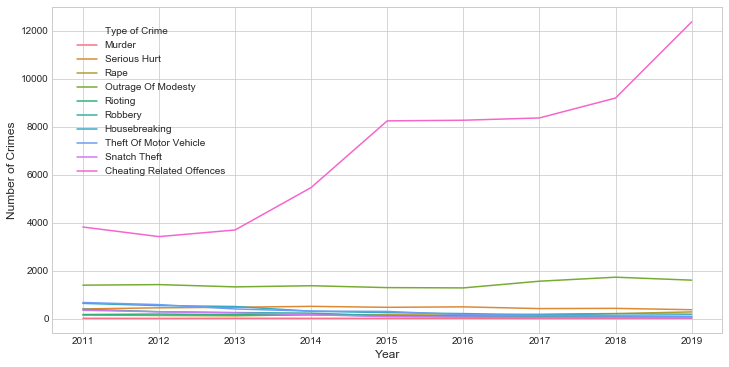

In [483]:
ax,fig=plt.subplots(figsize=(12,6))
sns.lineplot(x='Year',y='Number of Crimes',data=types_of_crime,hue='Type of Crime')

plt.legend(loc=[0.03,0.47])



<b>Inference </b>: This graph does not provide us with any valid insights apart from the trend that crimes related
           to Cheating Related Offences are increasing on an exponential scale. It also gives us an insight that 
           there is there are higher cases related to outrage of modesty than the rest.
           
     

<h2> Crime Committed based on Gender  </h2>

We have noted the increasing crime trends from our lineplot. Before divulging deeper into the committed crimes, we will look into genders first. This way, we are able to analyse trend from a specific gender and how the top crimes have been changing overall

In [484]:
offenders_gender=pd.read_csv("../crime analytics dataset copy (SCHOOL COPY)/persons-arrested-for-selected-major-offences-by-gender.csv")

offenders_gender.iloc[100:150].head()

,year,level_1,value
100,2011,Male Arrested For Robbery,283
101,2011,Female Arrested For Robbery,21
102,2011,Total Persons Arrested For Housebreaking,272
103,2011,Male Arrested For Housebreaking,251
104,2011,Female Arrested For Housebreaking,21


In [485]:
offenders_gender.rename(columns={'year':'Year','level_1':'Type of Crime','value':'Number of Crimes Committed'},inplace=True)

In [486]:
offenders_gender.groupby(['Type of Crime']).sum()['Number of Crimes Committed'].sort_values(ascending=False).head(10)

Type of Crime
Total Persons Arrested For Cheating & Related    19095
Male Arrested For Cheating & Related             13407
Total Persons Arrested For Outrage Of Modesty     9433
Male Arrested For Outrage Of Modesty              9356
Total Persons Arrested For Rioting                7102
Male Arrested For Rioting                         6585
Female Arrested For Cheating & Related            5688
Total Persons Arrested For Serious Hurt           4241
Male Arrested For Serious Hurt                    3774
Total Persons Arrested For Robbery                2602
Name: Number of Crimes Committed, dtype: int64

<b> From the grouped data, we do see the highest overall type of crimes. We will analyse trend from 2008 to 2018
to see if there have been any changes or how the number has changed. </b>


<b>Cleaning of Data </b>

In [487]:
offenders_gender.Year.map(str).map(int)

offenders_gender.Year=pd.to_datetime(offenders_gender.Year,format='%Y').dt.strftime('%Y')
offenders_gender

,Year,Type of Crime,Number of Crimes Committed
0,2008,Total Persons Arrested For Murder,41
1,2008,Male Arrested For Murder,37
2,2008,Female Arrested For Murder,4
3,2008,Total Persons Arrested For Rape,63
4,2008,Male Arrested For Rape,62
...,...,...,...
325,2018,Male Arrested For Serious Hurt,356
326,2018,Female Arrested For Serious Hurt,55
327,2018,Total Persons Arrested For Cheating & Related,2553
328,2018,Male Arrested For Cheating & Related,1744


Obtaining data of only 2008 and 2018 for a better overall picture over the last 10 years

In [488]:
h=offenders_gender[(offenders_gender['Year']=='2008')|(offenders_gender['Year']=='2018')].groupby(['Year','Type of Crime']).sum()['Number of Crimes Committed'].loc['2008'].to_frame()

In [489]:
i=offenders_gender[(offenders_gender['Year']=='2008')|(offenders_gender['Year']=='2018')].groupby(['Year','Type of Crime']).sum()['Number of Crimes Committed'].loc['2018'].to_frame()

In [490]:
pd.concat([h,i],axis=1).head() #overview of the crimes committed by gender in 2008 and 2018





,Number of Crimes Committed,Number of Crimes Committed
Type of Crime,,
Female Arrested For Cheating & Related,446,809
Female Arrested For Housebreaking,12,15
Female Arrested For Murder,4,2
Female Arrested For Outrage Of Modesty,6,10
Female Arrested For Rape,1,0


<b> we concat-ed the data to provide on overview of crimes by gender in 2008 and 2018. We will create pie-charts for better and clearer observations </b>

<h2>1) Cheating and Related Offences </h2>

In [491]:
Cheating_and_Related=offenders_gender[offenders_gender['Type of Crime'].str.contains('Cheating')].loc[(offenders_gender.Year=='2008')|(offenders_gender.Year=='2018')]
Cheating_and_Related_edited=Cheating_and_Related.drop([27,327],axis=0).pivot(index='Type of Crime',columns='Year',values='Number of Crimes Committed')
#we are dropping total crimes since we are looking into gender
Cheating_and_Related_edited



Year,2008,2018
Type of Crime,,
Female Arrested For Cheating & Related,446,809
Male Arrested For Cheating & Related,1121,1744


In [492]:
Cheating_and_Related_edited.index[0].split(' ',maxsplit=3)[-1]

'Cheating & Related'

Creating a dictionary to reuse code for the top 5 crimes

In [493]:
def plotting_piechart(Cheating_and_Related_edited):
    
    title=Cheating_and_Related_edited.index[0].split(' ',maxsplit=3)[-1] #we obtain the keywords for our title 
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,6))  #plotting the figure and setting the axes
    
    for ax, col in zip((ax1,ax2), Cheating_and_Related_edited.columns): 
        ax.pie(Cheating_and_Related_edited[col],labels=['Female','Male'], wedgeprops=dict(width=0.3), #this creates a hollow circle
               explode=[0.008,0.008],colors=['#ffb3e6','#c2c2f0'],pctdistance=0.86,autopct='%1.1f%%')
        ax.set(ylabel='', title='', aspect='equal')
       
        ax1.set_title(title +' ' +'2008',loc='center',fontsize=14)
        ax2.set_title(title +' ' +'2018',loc='center',fontsize=14)
        
        plt.tight_layout()

        
        


In [4626]:
#plotting_piechart(Cheating_and_Related_edited)

<h3>2) OUTRAGE OF MODESTY </h3>

In [494]:
outrage_modesty=offenders_gender[offenders_gender['Type of Crime'].str.contains('Modesty')].loc[(offenders_gender.Year=='2008')|(offenders_gender.Year=='2018')]

outrage_modesty.drop([6,306],axis=0)


,Year,Type of Crime,Number of Crimes Committed
7,2008,Male Arrested For Outrage Of Modesty,746
8,2008,Female Arrested For Outrage Of Modesty,6
307,2018,Male Arrested For Outrage Of Modesty,1112
308,2018,Female Arrested For Outrage Of Modesty,10


In [495]:
outage_modesty_edited=outrage_modesty.drop([6,306],axis=0).pivot(index='Type of Crime',columns='Year',values='Number of Crimes Committed')

In [496]:
outage_modesty_edited

Year,2008,2018
Type of Crime,,
Female Arrested For Outrage Of Modesty,6,10
Male Arrested For Outrage Of Modesty,746,1112


In [4627]:
#plotting_piechart(outage_modesty_edited)

<h3>3)  RIOTING </h3>

In [497]:
Riot=offenders_gender[offenders_gender['Type of Crime'].str.contains('Rioting')].loc[(offenders_gender.Year=='2008')|(offenders_gender.Year=='2018')]
Riot


,Year,Type of Crime,Number of Crimes Committed
21,2008,Total Persons Arrested For Rioting,803
22,2008,Male Arrested For Rioting,738
23,2008,Female Arrested For Rioting,65
321,2018,Total Persons Arrested For Rioting,381
322,2018,Male Arrested For Rioting,361
323,2018,Female Arrested For Rioting,20


In [498]:
Riot_edited=Riot.drop([21,321],axis=0).pivot(index='Type of Crime',columns='Year',values='Number of Crimes Committed')



In [4628]:
#plotting_piechart(Riot_edited)

<h2>4) Robbery </h2>

In [4718]:
Robbery=offenders_gender[offenders_gender['Type of Crime'].str.contains('Robbery')].loc[(offenders_gender.Year=='2008')|(offenders_gender.Year=='2018')]
Robbery



,Year,Type of Crime,Number of Crimes Committed
9,2008,Total Persons Arrested For Robbery,434
10,2008,Male Arrested For Robbery,407
11,2008,Female Arrested For Robbery,27
309,2018,Total Persons Arrested For Robbery,99
310,2018,Male Arrested For Robbery,94
311,2018,Female Arrested For Robbery,5


In [4719]:
Robbery_edited=Robbery.drop([9,309],axis=0).pivot(index='Type of Crime',columns='Year',values='Number of Crimes Committed')

#plotting_piechart(Robbery_edited)  #change dict name to piechart not barchart


<h2>5) CAUSING SERIOUS HURT </h2>

In [4720]:
Serious_hurt=offenders_gender[offenders_gender['Type of Crime'].str.contains('Hurt')].loc[(offenders_gender.Year=='2008')|(offenders_gender.Year=='2018')]
Serious_hurt

,Year,Type of Crime,Number of Crimes Committed
24,2008,Total Persons Arrested For Serious Hurt,284
25,2008,Male Arrested For Serious Hurt,256
26,2008,Female Arrested For Serious Hurt,28
324,2018,Total Persons Arrested For Serious Hurt,411
325,2018,Male Arrested For Serious Hurt,356
326,2018,Female Arrested For Serious Hurt,55


In [4721]:
Serious_hurt_edited=Serious_hurt.drop([24,324],axis=0).pivot(index='Type of Crime',columns='Year',values='Number of Crimes Committed')

#plotting_piechart(Serious_hurt_edited)  #change dict name to piechart not barchart


<h2> Plotting Data in a Pie-Chart </h2>

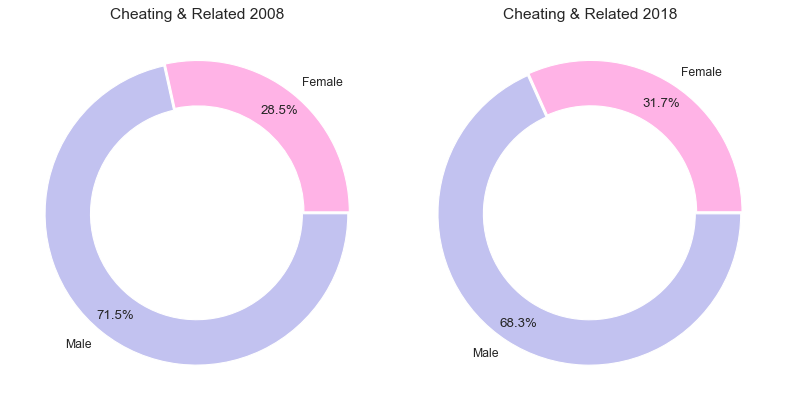

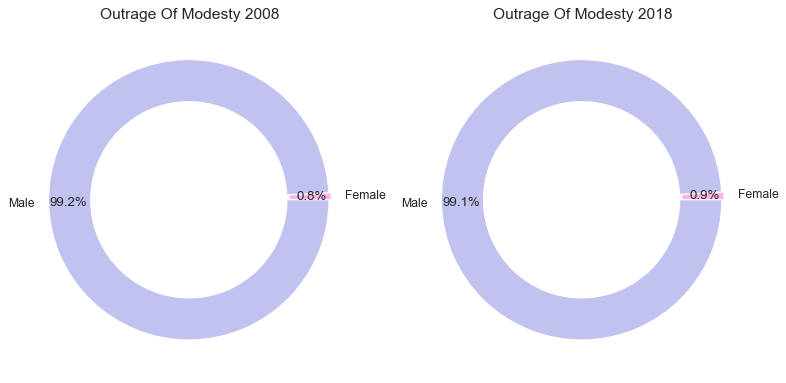

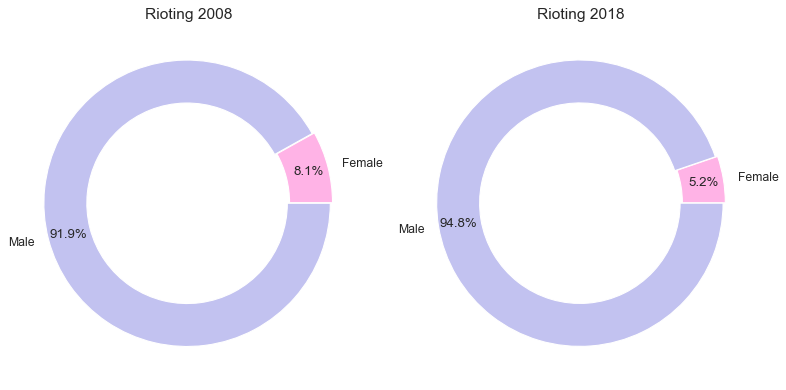

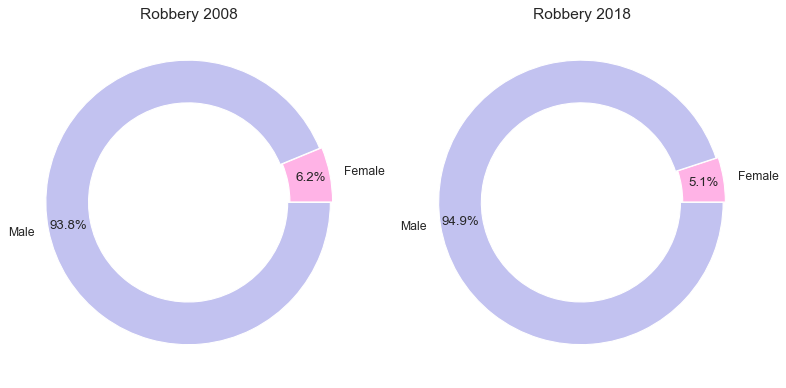

In [4722]:
plotting_piechart(Cheating_and_Related_edited)
plotting_piechart(outage_modesty_edited)
plotting_piechart(Riot_edited)
plotting_piechart(Robbery_edited)
#plotting_piechart(Serious_hurt_edited)


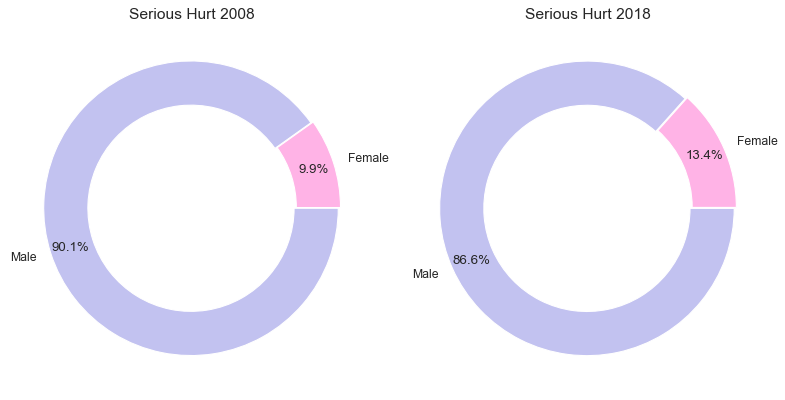

In [4723]:
plotting_piechart(Serious_hurt_edited)

<b>Observation </b>:

From the above visualization, we infer that crimes committed by males exceed that of women by many fold. There is
also a low number of 'Outrage of Modesty' crimes committed by women which reinforces the idea that these crimes
are usually committed by men. 

From the years 2008 to 2018, we do notice that except for robbing and rioting, there are more women committing 
crimes. A quarter of cheating or related crimes are committed by women. Another crime to observe would be Serious 
Hurt. Women by anatomy are weaker then men and most of them would not have the body strength to fight/ seriously
hurt someone. But there are more women committing such crimes.

<h2> Top Crimes Committed by Women </h2>

We did observe that women do not commit crimes on the same aggravted level as men but there is a slow, increasing trend. We will try to find if the top 5 committed crimes by women differ from the overall crimes committed since we observed such trends among women

In [500]:

#obtaining data of crimes committed by women in 2008 and 2018

crimes_by_women=offenders_gender[offenders_gender['Type of Crime'].str.contains('Female')].sort_values(by=['Number of Crimes Committed'],ascending=False).iloc[0:100]
crimes_by_women_2008_2018=crimes_by_women[(crimes_by_women.Year=='2008') |(crimes_by_women.Year=='2018')].sort_values(by=['Year','Number of Crimes Committed'],ascending=False)



display(crimes_by_women_2008_2018[:5]) #top 5 crimes by women in 2018


display(crimes_by_women_2008_2018[9:14:1])  #top 5 crimes by women in 2008



,Year,Type of Crime,Number of Crimes Committed
329,2018,Female Arrested For Cheating & Related,809
326,2018,Female Arrested For Serious Hurt,55
323,2018,Female Arrested For Rioting,20
314,2018,Female Arrested For Housebreaking,15
308,2018,Female Arrested For Outrage Of Modesty,10


,Year,Type of Crime,Number of Crimes Committed
29,2008,Female Arrested For Cheating & Related,446
23,2008,Female Arrested For Rioting,65
26,2008,Female Arrested For Serious Hurt,28
11,2008,Female Arrested For Robbery,27
14,2008,Female Arrested For Housebreaking,12


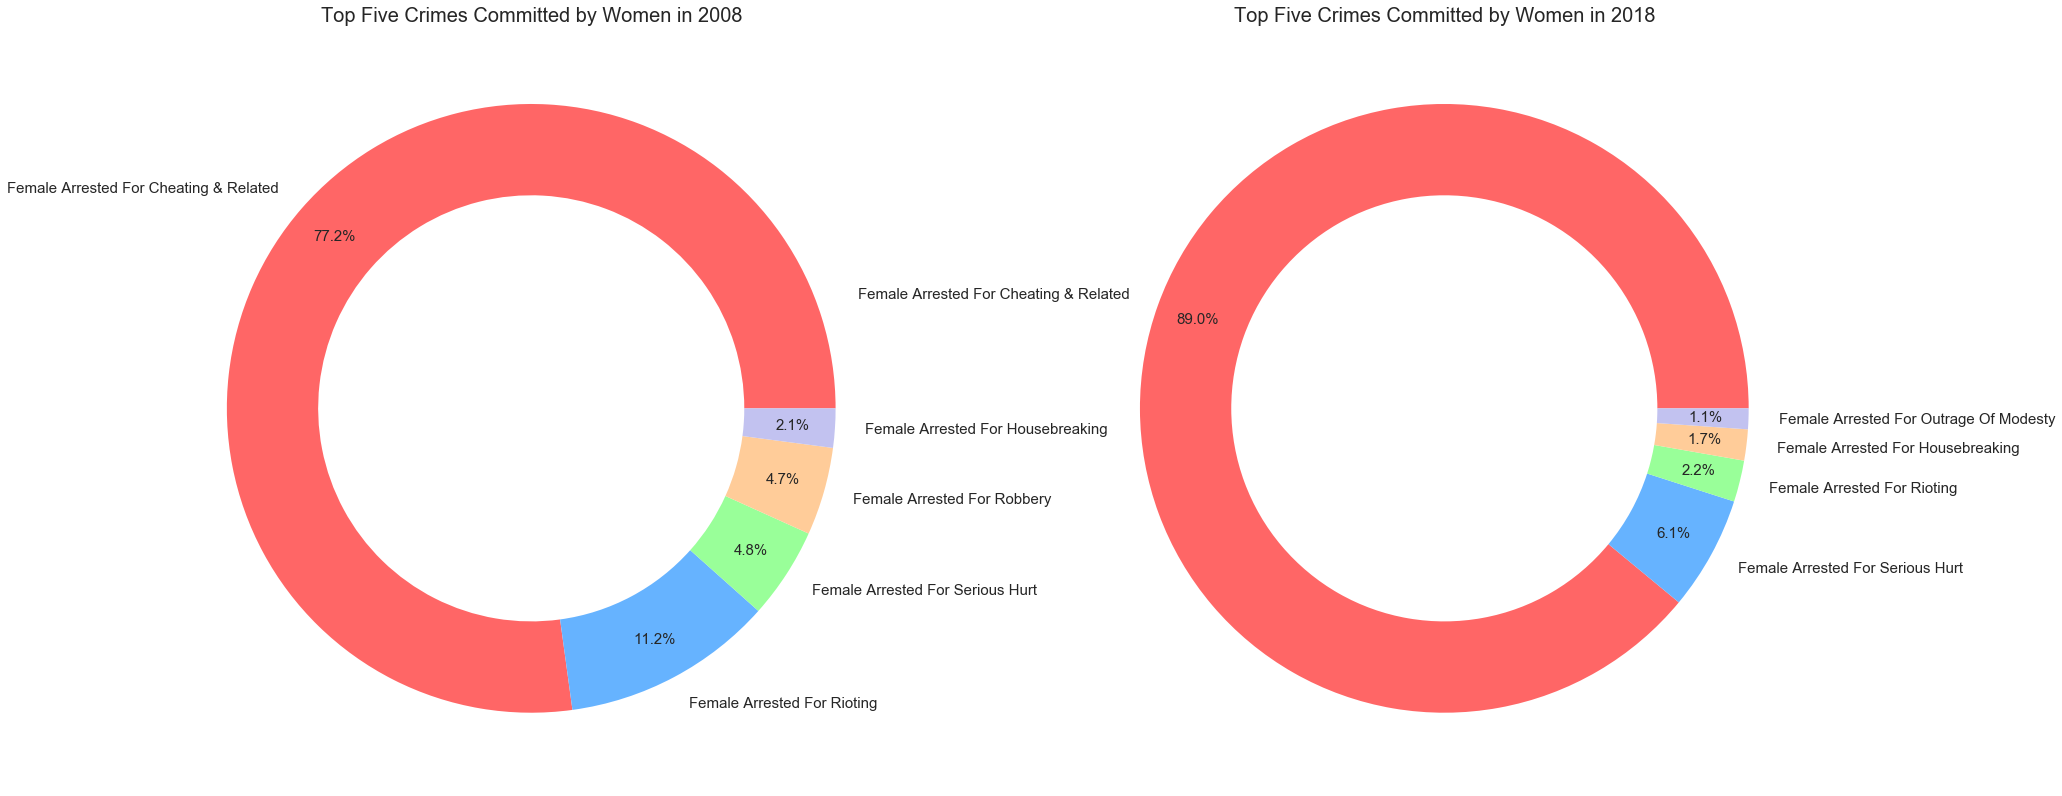

In [525]:


fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,20))
                           



ax1.pie(crimes_by_women_2008_2018[9:14:1]['Number of Crimes Committed'],labels=crimes_by_women_2008_2018[9:14:1]['Type of Crime'],
       autopct='%1.1f%%',colors = ['#ff6666','#66b3ff','#99ff99','#ffcc99','#c2c2f0'],wedgeprops=dict(width=0.3),pctdistance=0.86,
        textprops={'fontsize': 15}
       )

ax2.pie(crimes_by_women_2008_2018[:5]['Number of Crimes Committed'],labels=crimes_by_women_2008_2018[:5]['Type of Crime'],
       autopct='%1.1f%%',colors = ['#ff6666','#66b3ff','#99ff99','#ffcc99','#c2c2f0'],wedgeprops=dict(width=0.3),pctdistance=0.86,
        textprops={'fontsize': 15}
       )



ax1.set_title('Top Five Crimes Committed by Women in 2008',fontsize=20)

ax2.set_title('Top Five Crimes Committed by Women in 2018',fontsize=20)

plt.show()



<b> Observation </b>

From the above, when we observe the crimes committed by women to see if women committ crimes that do not constitute any position in the top 5, we can confirm that it is usually not the case.

Let us look into 2008, Housebreaking does not constitute any position in top 5 among the overall crimes committed.
However, it is 4th most committed crimes by women. 

In 2018, outrage of modesty does not constitute one of the top 5 crimes committed by women despite it being one of top 5 crimes committed overall.

<b> What could be the reason for these two anomaly? </b>

To find women committing crimes that fall under the umbrella of sexual assault could be somewhat unheard of. However, a lot has changed in the past 10 years. With more awareness related to sexual assault and with campaigns such as #metoo, we do see more women and men coming out to file cases against their perpetrators. This could be one of the reasons why 'Outrage of Modesty' is one of the top five crimes committed by women in 2018. This shows that men could also be victims of sexual assault which is not something that is widely talked about. 

We will dive into this part of the data soon to analyse how Singapore has tackled crimes alike.


<h2> Overall Crimes Committed by Women </h2>



Text(0, 0.5, 'Number of Crimes Committed')

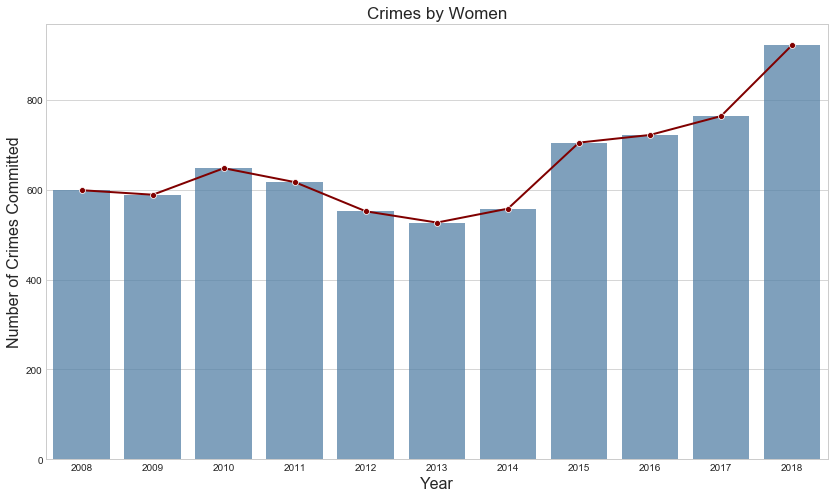

In [526]:
ax1.fig=plt.subplots(figsize=(14,8))

#dataframe to plot by extracting the year for x-axis and number of crimes in the y-axis
crimes_by_women_by_year=crimes_by_women.groupby('Year').sum()['Number of Crimes Committed'].to_frame().reset_index()

#lineplot and a bar plot to depict the increase in crimes committed by women
ax1=sns.lineplot(x='Year',y='Number of Crimes Committed',data=crimes_by_women_by_year,linewidth=2,marker='o',color='maroon')
ax1=sns.barplot(x='Year',y='Number of Crimes Committed',data=crimes_by_women_by_year,color='steelblue',alpha=0.75)


#Plotting

plt.title('Crimes by Women',fontsize=17)
ax1.set_xlabel('Year',fontsize=16)
ax1.set_ylabel('Number of Crimes Committed',fontsize=16)




<h3> Percent Increase in the Number of Crimes Committed by Women </h3>

In [527]:
crimes_by_women.groupby('Year').sum()['Number of Crimes Committed'].pct_change()

Year
2008         NaN
2009   -0.016694
2010    0.100170
2011   -0.047840
2012   -0.105348
2013   -0.045290
2014    0.058824
2015    0.263441
2016    0.024113
2017    0.058172
2018    0.206806
Name: Number of Crimes Committed, dtype: float64

<b> Observation </b>:

From the year 2008 to 2013, the number of crimes committed by women was reducing. Howeverm from the year 2014 onwards, there has been a gradual increase

There has been a 20% increase in crimes committed by women yearly since 2014 to 2018.

(a) As mentioned above, it is clearly understood that women could also commit henoius crimes that 
    society usually dictates that are committed by men. There has been a high increase in cheating and related         crimes by women. According to the <INSERT SOURCES>, scams are huge part of cheating/related offences and          'sex/love' scam tops them all. Women who commit these crimes can go this way to cheat and deceive people.

<h2> Crime Rates Over the Last Five Years </h2>

We will take a look into how the top five crimes committed the past 5 years progressed. Now, continuing from our line chart plotted above, we can plot how crimes have progressed
over the last 5 years

In [542]:
offenders_gender_last_five_years=offenders_gender[offenders_gender.Year.map(int)>=2014] #obtaining years from 20144 onwards
offenders_gender_last_five_years[0::3].head()   



,Year,Type of Crime,Number of Crimes Committed
180,2014,Total Persons Arrested For Murder,24
183,2014,Total Persons Arrested For Rape,104
186,2014,Total Persons Arrested For Outrage Of Modesty,843
189,2014,Total Persons Arrested For Robbery,210
192,2014,Total Persons Arrested For Housebreaking,182


In [543]:
pivot_df=offenders_gender_last_five_years[0::3].pivot(index='Year',columns='Type of Crime',values='Number of Crimes Committed')
pivot_df  #pivot table to obtain a table view of the crimes committed





Type of Crime,Total Persons Arrested For Cheating & Related,Total Persons Arrested For Housebreaking,Total Persons Arrested For Murder,Total Persons Arrested For Outrage Of Modesty,Total Persons Arrested For Rape,Total Persons Arrested For Rioting,Total Persons Arrested For Robbery,Total Persons Arrested For Serious Hurt,Total Persons Arrested For Snatch Theft,Total Persons Arrested For Theft Of Motor Vehicle
Year,,,,,,,,,,
2014,1543,182,24,843,104,697,210,479,68,121
2015,1883,194,18,861,75,530,126,460,41,141
2016,1827,166,43,872,91,542,108,480,38,85
2017,2149,157,14,975,88,439,93,394,46,109
2018,2553,176,9,1122,172,381,99,411,35,73


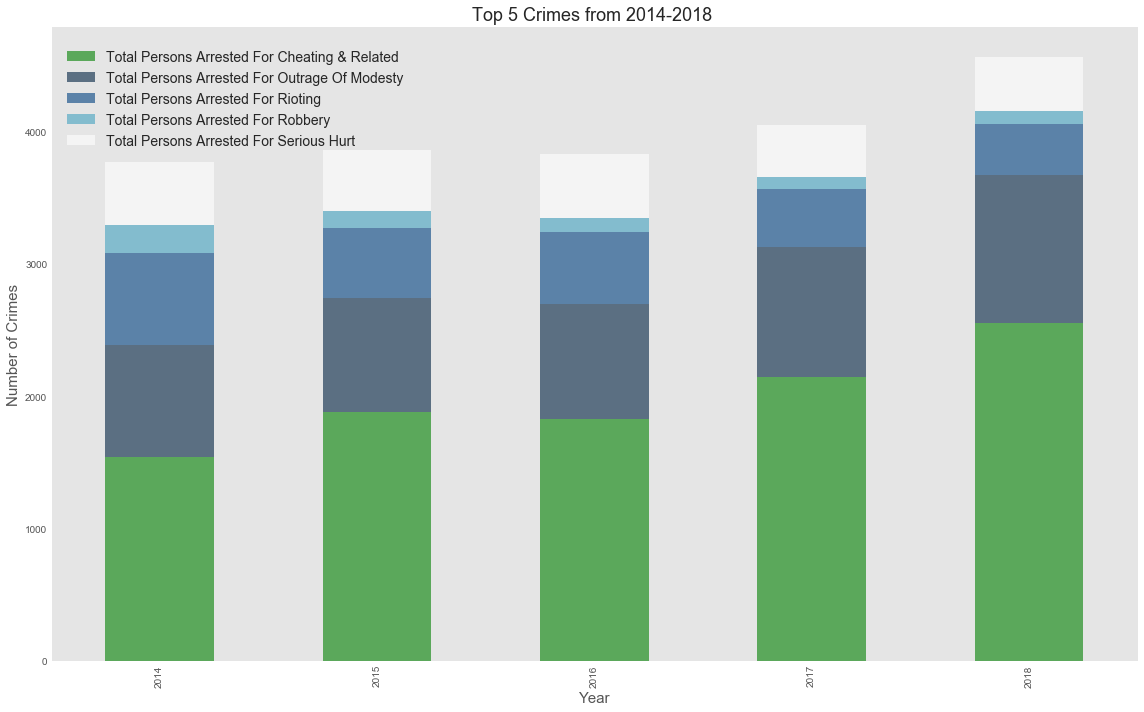

In [566]:
plt.style.use('ggplot')



pivot_df.loc[:,['Total Persons Arrested For Cheating & Related','Total Persons Arrested For Outrage Of Modesty','Total Persons Arrested For Rioting','Total Persons Arrested For Robbery','Total Persons Arrested For Serious Hurt']].plot.bar(stacked=True,
cmap='ocean',alpha=0.6,figsize=(16,10)) #plotting barplots


#plotting labels

plt.title('Top 5 Crimes from 2014-2018 ',fontsize=18)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Crimes',fontsize=15)
plt.legend(loc=[0.01,0.80],prop={'size': 14})  #using loc to adjust the position of our legend table


plt.grid()
plt.tight_layout()
plt.show()



<b> We can map a correlation plot to see how highly related certain variables are </b>

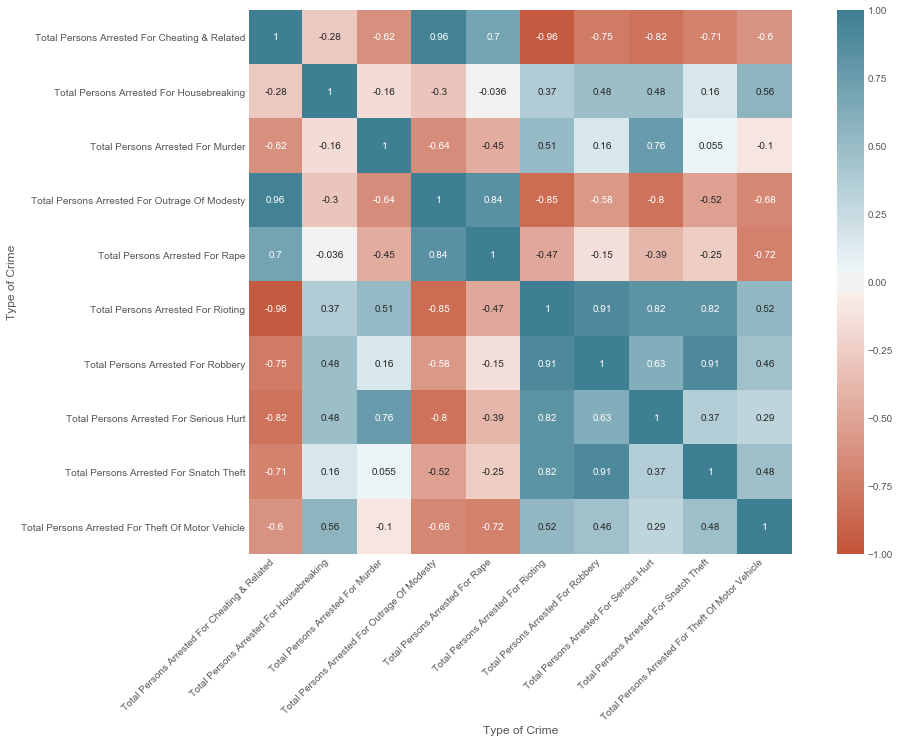

In [567]:
correlation_df=pivot_df.corr()

ax.fig=plt.subplots(figsize=(16,10))

ax=sns.heatmap(correlation_df,vmin=-1,vmax=1,center=0,annot=True,square=True,cmap=sns.diverging_palette(20, 220, n=300))

ax.set_xticklabels(
ax.get_xticklabels(),
rotation=45,
horizontalalignment='right');


The above correlation heatmap could provide us with an estimate of the kinds of crimes that are correlated. There
is a high correlation between 

(Robbery and theft),
(rioting and robbery),
(outrage of modesty and rape).

<b> What does this tell us? </b>

Looking into robbery and theft, they both fall under the same classfication of taking something away from someone
but involves force or lack of force. We could interpret that a person who commits robbery would most likely steal
something (theft) and this could provide us with a classification of what type of crime one is most likely to commit. The peason correlation between outrage of modesty and rape is +0.81, which is a high number. Both fall under the classifiction of sexual assault but the severity varies, very similar to the above example. 

<h2> Analysis into Outrage of Modesty and Rape </h2>

From our above analysis, we did notice more women committing crimes such as outrage of modesty in the year 2018
as compared to 2018. Now, let us dwelve deep into this section of the data

In [568]:
types_of_crime.groupby(['Year','Type of Crime']).sum()['Number of Crimes']  #grouping by year and type of crime
types_of_crime.drop(types_of_crime.loc[80:89].index,inplace=True) #dropping 2019 crimes since we are dealing up until 2018

From our correlation, we did observe an extremely high correlation between outrage of modesty and rape
which comes under the classification of Sexual Assault. It would be highly be appropriate to analyse both
these data together since many a times rape would be the next step after outraging the modesty of an individual.

In [569]:
#sorting data according to the type of crimes
types_of_crime_assualt=types_of_crime[(types_of_crime['Type of Crime']=='Rape') |(types_of_crime['Type of Crime']=='Outrage Of Modesty')]
display(types_of_crime_assualt[types_of_crime_assualt.loc[:,'Type of Crime']=='Rape'].head(2))
types_of_crime_assualt[types_of_crime_assualt.loc[:,'Type of Crime']=='Outrage Of Modesty'].head(2)


,Year,Type of Crime,Number of Crimes
2,2011,Rape,150
12,2012,Rape,133


,Year,Type of Crime,Number of Crimes
3,2011,Outrage Of Modesty,1396
13,2012,Outrage Of Modesty,1420


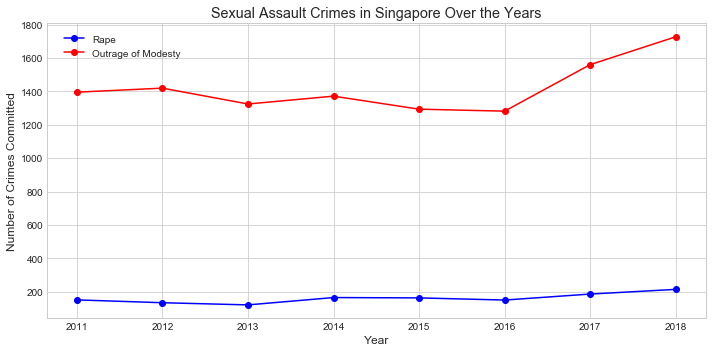

In [570]:
#style and fit figure

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))

#plots
plt.plot(types_of_crime_assualt[types_of_crime_assualt.loc[:,'Type of Crime']=='Rape'].Year,types_of_crime_assualt[types_of_crime_assualt.loc[:,'Type of Crime']=='Rape']['Number of Crimes'], label='Rape',color='blue',marker='o')
plt.plot(types_of_crime_assualt[types_of_crime_assualt.loc[:,'Type of Crime']=='Outrage Of Modesty'].Year,types_of_crime_assualt[types_of_crime_assualt.loc[:,'Type of Crime']=='Outrage Of Modesty']['Number of Crimes'],label='Outrage of Modesty',color='red',marker='o')

#alignment and layout
plt.title('Sexual Assault Crimes in Singapore Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Committed')
plt.legend(loc=[0.02,0.87])
plt.tight_layout()
plt.show()

<b> Observation </b>

Frome the above visualization, though the number of Rape cases have remained low and there has been a steady increase in
the number of crimes with regards to Outrage of Modesty, there has been an exponential spike in 2016. 

<b> Why 2016? </b>

It is to note that the #mee too movement vent viral in early 2017 which led to many conversations taking place about safety and assault against women and men via social media channels. Manywomen and men were coming forward
with their stories and calling out the people that assaulted them. 

It heated up when Oscar winning Hollywood Producer Harvey Weinstein was charged with rape and sexual assault by prominent and strong women in Hollywood.With the movement, men and women find solace and strength from listening to the stories and experiences of people. 

Celebrities have a huge influence on the youth. This could also be a motivator in which people are not afraid to come forward after building a community via social media. There are also more organizations and help centers available online where people can talk to. Singaporeans love American pop culture and are also heavy consumers of American entertainment. These could be reasons why there have been more cases of reports in Singapore.

<h2> Victims dataset </h2>

We have looked into the different types of crimes committed and now let us dwelve into the Victims dataset. 

Questions to Ponder:
    
1) Who are the victims?

2) Does the crimes committed match with the victims identified?



In [589]:
victims_by_gender=pd.read_csv("../crime analytics dataset copy (SCHOOL COPY)/victims-of-selected-major-offences-by-sex.csv")

#data cleaning:

#renaming columns, formatting date and sorting values by the number of crimes committed

victims_by_gender.columns=list(['Year','Type of Crime','No of Crimes Committed'])
victims_by_gender.Year=pd.to_datetime(victims_by_gender.Year,format='%Y').dt.strftime('%Y')
victims_by_gender.sort_values(by=['No of Crimes Committed'],ascending=False,inplace=True)  #we can see if plotting a heatmap would be good to check correlation


In [590]:
Year_sorted=victims_by_gender.Year.to_list()

In [591]:



victims_by_gender['Type of Crime']=victims_by_gender.apply(lambda x:'{}-{}'.format(x['Type of Crime'],x['Year']),axis=1)

In [592]:
victims_by_gender

,Year,Type of Crime,No of Crimes Committed
261,2018,Total Victims Of Cheating & Related-2018,7290
189,2015,Total Victims Of Cheating & Related-2015,6618
237,2017,Total Victims Of Cheating & Related-2017,6502
213,2016,Total Victims Of Cheating & Related-2016,6446
190,2015,Male Victims Of Cheating & Related-2015,4126
...,...,...,...
4,2008,Male Victims Of Rape-2008,0
100,2012,Male Victims Of Rape-2012,0
196,2016,Male Victims Of Rape-2016,0
172,2015,Male Victims Of Rape-2015,0


<b> Plotting Victims of top crimes in 2018 </b>

In [593]:
victims_by_gender_2018=victims_by_gender[victims_by_gender.Year=='2018'].iloc[0:50] #to do a wordcloud/bar after tokenization to plot

In [594]:
victims_by_gender_2018=victims_by_gender_2018[victims_by_gender_2018['Type of Crime'].str.contains('Total')]

In [595]:
#We can also analyse crimes committed vs the number of victims. were all perpetrators arrested? Arrest rate


top=sorted(list(zip(victims_by_gender_2018['Type of Crime'],victims_by_gender_2018['No of Crimes Committed'])),key=lambda x:x[1],reverse=True)[:20]


x,y=map(list,zip(*top))



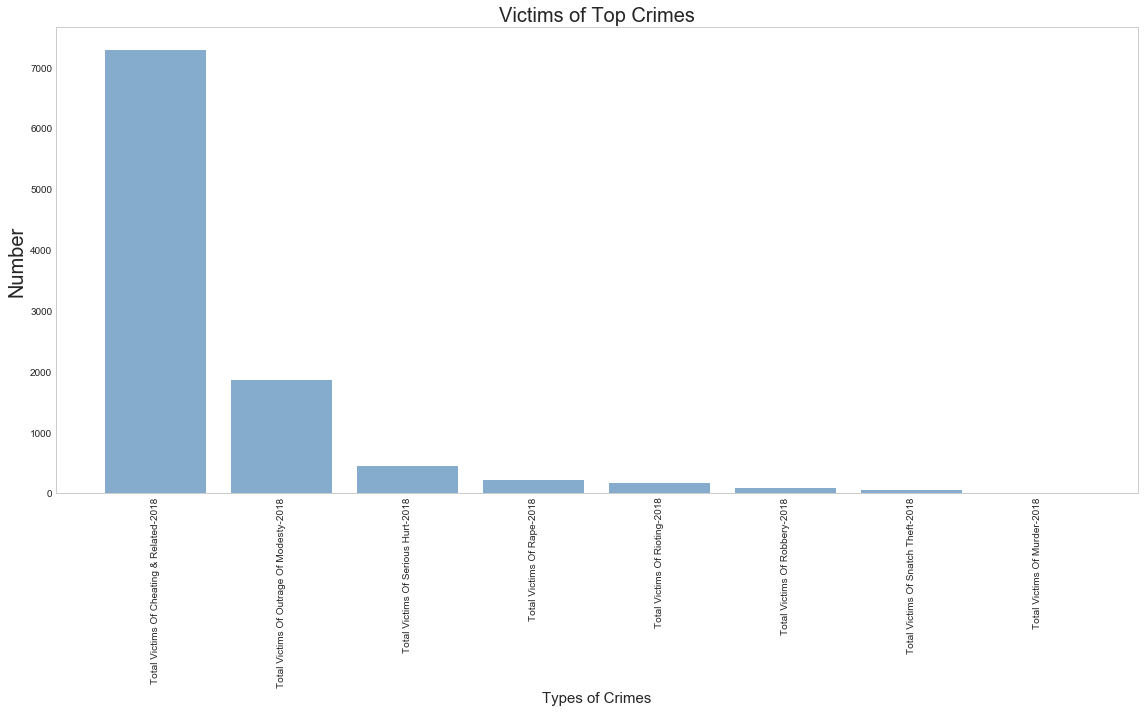

In [596]:
plt.figure(figsize=(16,10))



plt.bar(x,y,color='steelblue',alpha=0.66)


plt.xlabel('Types of Crimes in 2008',fontsize=15)
plt.ylabel('Number',fontsize=20)

plt.title('Victims of Top Crimes',fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.show()


#try to remove male and female


<b> Plotting top crimes in 2018 </b>

In [597]:
types_of_crime.sort_values(by=['Number of Crimes'],ascending=False,inplace=True)

In [598]:
types_of_crime.Year=pd.to_datetime(types_of_crime.Year,format='%Y').dt.strftime('%Y')


This data contains information from 2012 to 2019.

In [599]:
types_of_crime['Type of Crime']=types_of_crime.apply(lambda x:'{}-{}'.format(x['Type of Crime'],x['Year']),axis=1)

In [600]:
types_of_crime_2018=types_of_crime[types_of_crime['Year']=='2018']


In [601]:
types_of_crime_2018

,Year,Type of Crime,Number of Crimes
79,2018,Cheating Related Offences-2018,9193
73,2018,Outrage Of Modesty-2018,1728
71,2018,Serious Hurt-2018,429
72,2018,Rape-2018,213
76,2018,Housebreaking-2018,204
77,2018,Theft Of Motor Vehicle-2018,114
74,2018,Rioting-2018,107
75,2018,Robbery-2018,72
78,2018,Snatch Theft-2018,48
70,2018,Murder-2018,9


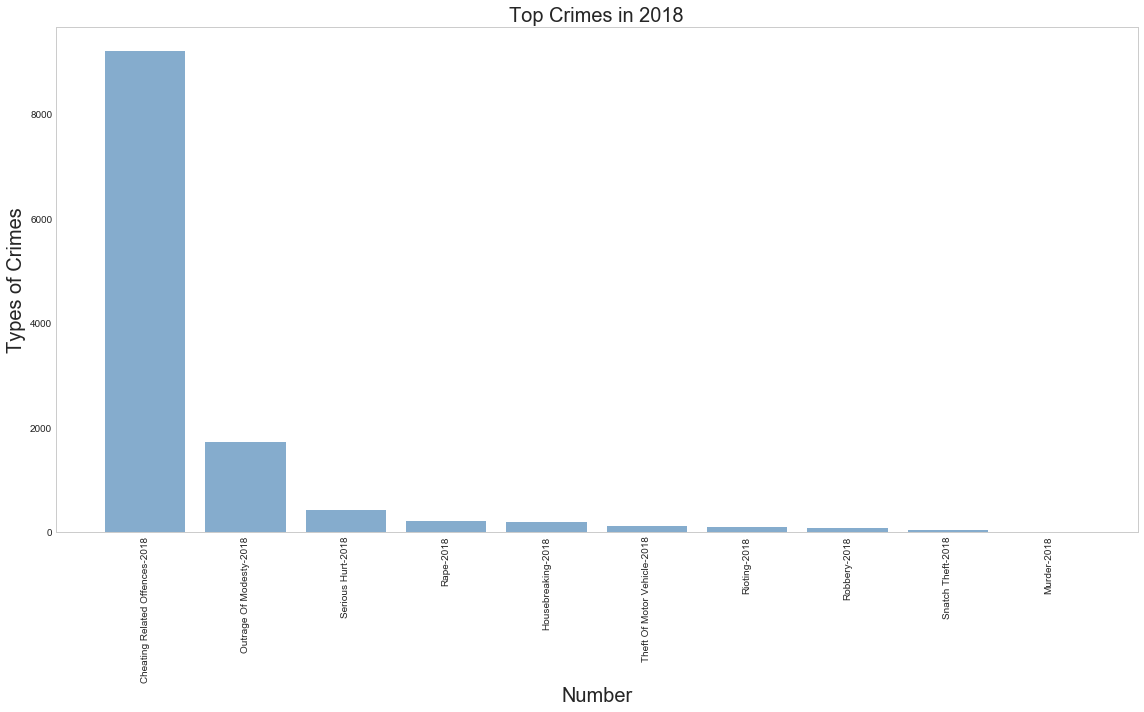

In [606]:
plt.figure(figsize=(16,10))

top=sorted(list(zip(types_of_crime_2018['Type of Crime'],types_of_crime_2018['Number of Crimes'])),key=lambda x:x[1],reverse=True)[:20]


x,y=map(list,zip(*top))

plt.bar(x,y,color='steelblue',alpha=0.66)


plt.title('Top Crimes in 2018',fontsize=20)
plt.xlabel('Number',fontsize=20)
plt.ylabel('Types of Crimes',fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.show()


<b> Observation </b>

From our above visualization, it is confirmed that the cheating and related offences is the top committed crime and
also has the most number of victims in 2018. One key observation from the visualization is that the number of offences does not match the number of victims identified. This could be hesitation from the victim's part to report a police case or it could be that after nabbing the culprit, police could identify more of his/her crimes.

Victim hesitation could be a serious problem due to the repercussions that someone has to face

In [607]:
types_of_crime=types_of_crime.drop(types_of_crime.index[0])
types_of_crime.head(2)

,Year,Type of Crime,Number of Crimes
69,2017,Cheating Related Offences-2017,8364
59,2016,Cheating Related Offences-2016,8268


We now will observe the number of crimes registered vs the actual number of people arrested.


Why?

Just like how we observed different numbers between the two different variables, we could now look into
how effective are the police in nabbing these criminals

In [608]:
#since we are looking at the total numbers, we will forgo male and female datas

without_gender=pd.read_csv("../crime analytics dataset copy (SCHOOL COPY)/persons-arrested-for-selected-major-offences-by-gender.csv")
without_gender=without_gender[0::3] #to obtain total crimes
without_gender.head()


,year,level_1,value
0,2008,Total Persons Arrested For Murder,41
3,2008,Total Persons Arrested For Rape,63
6,2008,Total Persons Arrested For Outrage Of Modesty,752
9,2008,Total Persons Arrested For Robbery,434
12,2008,Total Persons Arrested For Housebreaking,263


In [609]:
without_gender.year.map(int)
without_gender.sort_values(by=['year'],ascending=False,inplace=True)
#without_gender=without_gender[without_gender.year>=2014]

without_gender.columns=list(['Year','Offences','Number of Offences'])


<b> Top 10 arrests made in 2018 </b>

In [610]:
top_10_arrests_2018=without_gender.sort_values(by=['Year','Number of Offences'],ascending=False).head(10)
top_10_arrests_2018

,Year,Offences,Number of Offences
327,2018,Total Persons Arrested For Cheating & Related,2553
306,2018,Total Persons Arrested For Outrage Of Modesty,1122
324,2018,Total Persons Arrested For Serious Hurt,411
321,2018,Total Persons Arrested For Rioting,381
312,2018,Total Persons Arrested For Housebreaking,176
303,2018,Total Persons Arrested For Rape,172
309,2018,Total Persons Arrested For Robbery,99
315,2018,Total Persons Arrested For Theft Of Motor Vehicle,73
318,2018,Total Persons Arrested For Snatch Theft,35
300,2018,Total Persons Arrested For Murder,9


<b> Top 10 offences in 2018 </b>

In [4794]:
top_10_offences_2018=types_of_crime[types_of_crime.Year=='2018'].sort_values(by=['Number of Crimes'],ascending=False).head(10)

In [1]:
top_10_offences_2018


In [612]:
display(types_of_crime_2018)

display(top_10_arrests_2018)

,Year,Type of Crime,Number of Crimes
79,2018,Cheating Related Offences-2018,9193
73,2018,Outrage Of Modesty-2018,1728
71,2018,Serious Hurt-2018,429
72,2018,Rape-2018,213
76,2018,Housebreaking-2018,204
77,2018,Theft Of Motor Vehicle-2018,114
74,2018,Rioting-2018,107
75,2018,Robbery-2018,72
78,2018,Snatch Theft-2018,48
70,2018,Murder-2018,9


,Year,Offences,Number of Offences
327,2018,Total Persons Arrested For Cheating & Related,2553
306,2018,Total Persons Arrested For Outrage Of Modesty,1122
324,2018,Total Persons Arrested For Serious Hurt,411
321,2018,Total Persons Arrested For Rioting,381
312,2018,Total Persons Arrested For Housebreaking,176
303,2018,Total Persons Arrested For Rape,172
309,2018,Total Persons Arrested For Robbery,99
315,2018,Total Persons Arrested For Theft Of Motor Vehicle,73
318,2018,Total Persons Arrested For Snatch Theft,35
300,2018,Total Persons Arrested For Murder,9


In [613]:
display(types_of_crime_2018['Number of Crimes'].tolist())
top_10_arrests_2018['Number of Offences'].tolist()

[9193, 1728, 429, 213, 204, 114, 107, 72, 48, 9]

[2553, 1122, 411, 381, 176, 172, 99, 73, 35, 9]

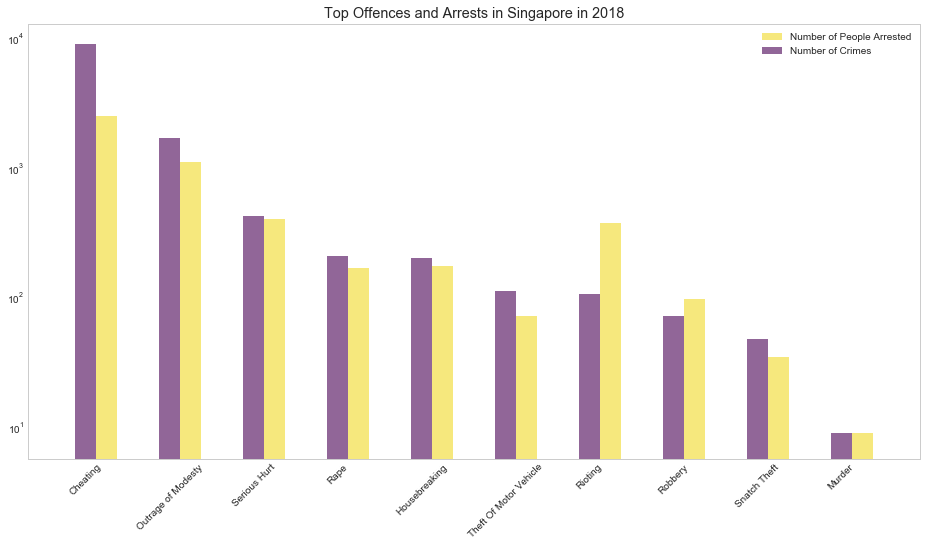

In [614]:

plt.figure(figsize=(16,8))
plt.title('Top Offences and Arrests in Singapore in 2018')

labels=['Cheating','Outrage of Modesty','Serious Hurt','Rape','Housebreaking','Theft Of Motor Vehicle','Rioting','Robbery','Snatch Theft','Murder']



x_indexes=np.arange(len(labels))

x=[2553,1122,411,172,176,73,381,99,35,9]  #arrested criminals in 2018
y=[9193,1728,429,213,204,114,107,72,48,9]  #crimes committed in 2018

width=0.25


plt.bar(x_indexes+width,x,label='Number of People Arrested',width=width,color="#f3e151",alpha=0.75,log=True) 
plt.bar(x_indexes,y,label='Number of Crimes',width=width,color="#6c3376",alpha=0.75,log=True)

plt.grid()
plt.legend()
plt.margins(x=0.06, tight=True)
plt.xticks(x_indexes,labels=labels)
plt.xticks(rotation=45)
plt.show()


From the above graph, we can notice something peculiar. There are more people arrested for rioting when compared to
the total number of crimes (rioting) recorded.

<b> Assumption </b>:

1) People riot in groups. It could be that the 107 cases of riot recorded could be groups of people coming together. For every riot in 2018, there could have been 3 arrests made. For eg., in 2013, a riot took place
in Singapore known as 'Little India' Riots. It amassed 300 people. It is known as one case of riot but with
300 people taking part in it.


2) There could have been an error made when recording the numbers

To dig deeper into the analysis, a quick google search was done. An article published in 2018 informed that a group of boys home residents' were charged rioting in October 2018. This could explain the peculiarity as these boys are in prison serving their time. Therefore, no further arrests could be made on boys who are in jail/boys home. 

SOURCE: https://www.straitstimes.com/singapore/courts-crime/boys-home-riot-7-charged-with-rioting-with-weapons-1-youth-guidance-officer

We could infer that inmates on top of their original charge, could face more charges should they commit any additional crimes when serving their time in prison.

<h2> Arrest Rate </h2>

An arrest rate is calculated by dividing the number of reported 
arrests by the respective population; the result is multiplied by 100,000. (OAG.CA, 2020)

Now that we have the visualization of crimes vs arrests made, we could take a deep look into arrest rates in
Singapore.

In [615]:
#We will calculate the arrest rate  by dividing it by the population of Singapore and multiplying it by 100 000.
#We will then apply the np.ceil to round up so that the smaller numbers are also visualized


top_10_arrests_2018['Arrest Rate Per 100 000 Population']=(top_10_arrests_2018['Number of Offences']/5639000) *100000


top_10_arrests_2018

,Year,Offences,Number of Offences,Arrest Rate Per 100 000 Population
327,2018,Total Persons Arrested For Cheating & Related,2553,45.273985
306,2018,Total Persons Arrested For Outrage Of Modesty,1122,19.897145
324,2018,Total Persons Arrested For Serious Hurt,411,7.288526
321,2018,Total Persons Arrested For Rioting,381,6.756517
312,2018,Total Persons Arrested For Housebreaking,176,3.121121
303,2018,Total Persons Arrested For Rape,172,3.050186
309,2018,Total Persons Arrested For Robbery,99,1.755630
315,2018,Total Persons Arrested For Theft Of Motor Vehicle,73,1.294556
318,2018,Total Persons Arrested For Snatch Theft,35,0.620677
300,2018,Total Persons Arrested For Murder,9,0.159603


In [616]:
top_10_arrests_2018['Arrest Rate Per 100 000 Population']=top_10_arrests_2018['Arrest Rate Per 100 000 Population'].apply(np.ceil)


Text(0.5, 1.0, 'Arrest Rate in 2018')

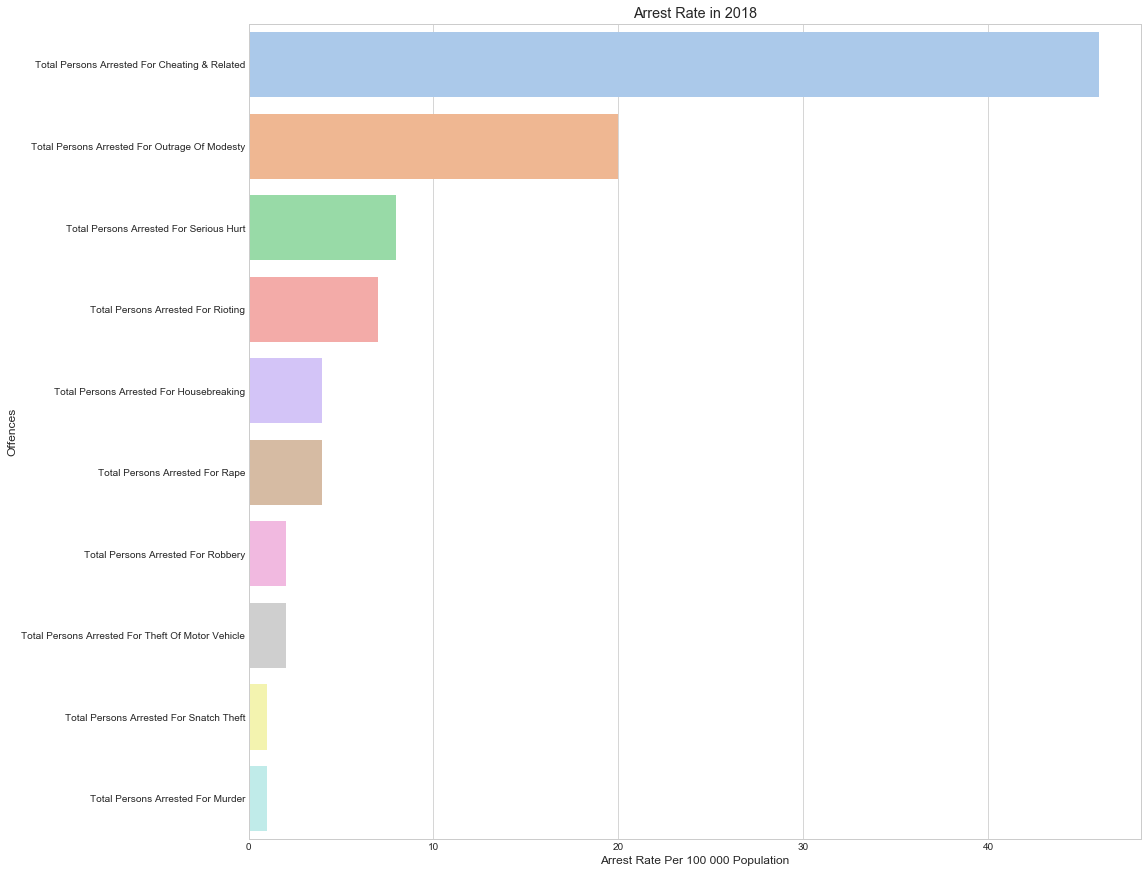

In [622]:
#plt.title('Visualization of Arrest Rate')
ax.fig=plt.subplots(figsize=(16,15))

ax=sns.barplot(y='Offences',x='Arrest Rate Per 100 000 Population',data=top_10_arrests_2018,palette='pastel')

ax.set_title('Arrest Rate in 2018')


<b> Observation </b>

From the computations, we can see that there are <b> 45 arrests made per 100 000 population </b> for Cheating & Related arrests. 

Singapore recorded a arrest rate of 0.159603, which when rounded is 0 while the average homicide/murder rate in 2018 in the world was 5.955 (source: https://data.worldbank.org/indicator/VC.IHR.PSRC.P5). This does add to the reputation Singapore has as one of the safest countries in the world. South American countries like El Salvador, Venezuela and Honduras have a high rate touching 40-50. Hong Kong and New Zealand recorded a rate of 1 which is about 50% higher than Singapore's data. 

<h2> Crimes Committed VS Arrest Rate </h2>

Another angle to observe could be how many people are arrested in comparison to the total number of crimes committed. We did take a look into Singapore's arrest rate and noticed that serious cases such as murder should
not be a threat to the country's safety due to the low arrest rate. However, let us look at whether the crimes committed are met with arrests and if the police are able to tackle such cases

Singapore is touted to be one of the safest countries in the world. Every polic report is dealt with seriousness
and arrests are made to upkeep the safety of the nation. Let us compare the figures by dividing the number of people arrested by the total crimes committed and converting it to percentage to analyse the figures



In [623]:
#x and y are values from the barplot plotted above

x=[2553,1122,411,172,176,73,381,99,35,9]  #arrested criminals in 2018
y=[9193,1728,429,213,204,114,107,72,48,9]  #crimes committed in 2018

top_crimes_of_2018=pd.DataFrame(list(zip(labels,y,x)),columns=['Type of Crime','Offences','Arrested'])

#dividing the number of arrests by offences and converting it to percentages
top_crimes_of_2018['rate']=top_crimes_of_2018.apply(lambda x:(x['Arrested']/x['Offences'])*100,axis=1)

In [624]:
top_crimes_of_2018.sort_values(by='rate')

,Type of Crime,Offences,Arrested,rate
0,Cheating,9193,2553,27.771130
5,Theft Of Motor Vehicle,114,73,64.035088
1,Outrage of Modesty,1728,1122,64.930556
8,Snatch Theft,48,35,72.916667
3,Rape,213,172,80.751174
4,Housebreaking,204,176,86.274510
2,Serious Hurt,429,411,95.804196
9,Murder,9,9,100.000000
7,Robbery,72,99,137.500000
6,Rioting,107,381,356.074766


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

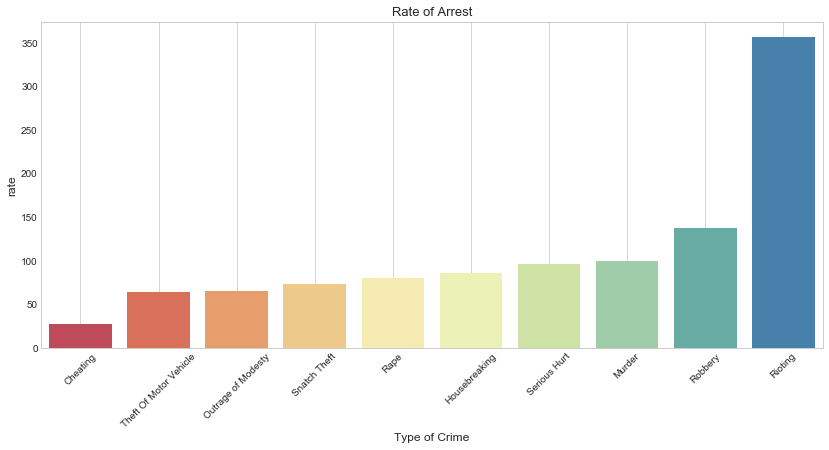

In [625]:
ax.fig=plt.subplots(figsize=(14,6))
sns.barplot(x='Type of Crime',y='rate',data=top_crimes_of_2018.sort_values(by='rate'),palette="Spectral")

plt.grid()
plt.title('Rate of Arrest',fontsize=13 )
plt.xticks(rotation=45)

<b> Observation </b>

<b> 1) Murder </b>

We can conclude that Murders in Singapore are taken seriously with a 100% arrested. This could be due to
the fact that Singapore is an island with high-level of security and with CCTV cameras fixed at every corner of the street. Due to the low occurrences of Murder in Singapore, every Murder case is dealt with due to the public interest that comes along with it. This adds on to our previous observation of Singapore's low arrest rate for 
murder (~0.15). 

<b> Conclusion </b>

We can conclude that there have been ~0.15 arrest rate made per 100 000 population. Since all accused murderers have been arrested, there is no way that a murder could escape his way. This also allows us to come to a conclusion that less than 1 person per 100 000 population is likely to commit serious crimes such as murders


<b> 2)  Riots </b>

The next offence is Riots. Taking into consideration the inmates dealt with for rioting in boys' home or rioting 
offences (107) committed without taking individual numbers, it is safe to say that along with murder, rioting is
taken with serious consideration and also has a serious repercussion.

How is rioting defined in Singapore:

<i> "Any member belonging to an assembly of 5 or more persons using force or violence to achieve a common purpose is considered guilty of rioting, also known as an “unlawful assembly”. </i>

It is well known that unlike other democratic nations, protests are illegal in Singapore.
Any public processions can only be participated by Singapore Citizens and Permanent Residents but they will be required to obtain a valid permit. Foreigners who participate in public demonstration could be deported. Many a
times, protests can turn into riots which could turn ugly. This could also be the reason why public demonstrations
are organised with utmost police scrutiny. 

Another reason why Singapore has a strict stance on public demonstration and riots in particular could be to maintain its racial harmony. The 1969 race riots and 2013 Little India riots changed the course of Singapore's
history. With the repercussions felt and to send a clear message to the people, strict policy changes were made.
An example would be the ban of sale of alcohol after 10.30pm was imposed due to riots in Little India. This data
could also send a clear message that there is no escape for anyone rioting in Singapore. If you riot, the police
will find you and have you arrested

<b> 3) Cheating and Related Offences </b>

According to this extract from the Singapore legal advice website:

<i>Section 415 of the Penal Code, cheating occurs when a person:

Fraudulently or dishonestly deceives the victim to either hand over property or money to any person, or consent that another person retains his property or money; or
Intentionally induces a deceived victim into either doing anything that he would not do if he had not been deceived, or omitting to do something that he would have done if he had not been deceived. The acts or omissions must also cause, or must be likely to cause, damage or harm to any person in body, mind, reputation or property.
An example of cheating includes where the cheater pretends to be from the government and intentionally deceives the victim to pay for goods which the victim did not mean to pay for. </i>


Cheating & Related offences though with the higest arrest rate (~45) 45 arrests per 100 000, the number of people arrested for committing such a crime is low with only 27% of people arrested. This should be a matter of concern
for the Singapore Police Force as only 27/100 people are arrested for cheating as compared to 100/100 people arrested for murders.

<b> Why low percentage of Arrests </b>

This could be due to the fact that Cheating could also include scams which usually involve calls or messages from overseas countries. This makes it impossible for Police to track them down, let alone, make arrests. This gives us a picture that only 27% of Cheating and Related Crimes are dealt with in the form of arrests. 

A google search would tell us that scams in Singapore are on a steady rise. SGD 168 million were cheated via scams
in 2018 alone (ChannelNewsAsia,2020). With brands/banks/government agencies using the internet to communicate with citizens, there has
also been scams that take advantage of citizen's naiveness. 

Owing to this, the government has been educating citiens on the cheating-related crimes in Singapore. A recent straits times article even mentioned that 65% of Singaporeans are most likely to fall for such scams.






<h2> Crime Rates Based on Residency Status </h2>


We have seen the gender, frequently committed crimes and crime rate. Now let us look at the crime rate based on residency status.
Singapore has low tolerence to crimes committed by Foreigners. Non-residents, if found guilty, could be deported
and banned from entering Singapore again. This is evident during the Covid-19 crisis where foreigners' work passes
were revoked. Permanent Residents found og unlawful behaviour could also face similar situations. Singapore citizens
who obtained citizenship via naturalization could also be stateless should they commit a heinous.

With that said, let us see now analyse how the crime rates far by status of residence.

In [626]:
crimes_by_residence=pd.read_csv("../additional crime dataset/persons-arrested-by-group.csv")
crimes_by_residence.columns=['Year','Residence Type','Number of Crimes Committed']
crimes_by_residence.Year=crimes_by_residence.Year.map(str)
crimes_by_residence.head()

,Year,Residence Type,Number of Crimes Committed
0,2011,Total Persons Arrested,18561
1,2011,Singaporeans/ Permanent Residents,14668
2,2011,Foreigners,3893
3,2011,Above 21 Years Old,14280
4,2011,21 Years Old And Below,4281


In [627]:
#Crimes by residences in 2018

crimes_by_residence.groupby(['Year','Residence Type'])['Number of Crimes Committed'].sum().loc['2018']


Residence Type
21 Years Old And Below                3482
Above 21 Years Old                   13738
Foreigners                            4489
Singaporeans/ Permanent Residents    12731
Total Persons Arrested               17220
Youths (7 To 19 Years Old)            2703
Name: Number of Crimes Committed, dtype: int64

In [628]:
crimes_by_residence=crimes_by_residence.groupby(['Year','Residence Type'])['Number of Crimes Committed'].sum()
crimes_by_residence

Year  Residence Type                   
2011  21 Years Old And Below                4281
      Above 21 Years Old                   14280
      Foreigners                            3893
      Singaporeans/ Permanent Residents    14668
      Total Persons Arrested               18561
      Youths (7 To 19 Years Old)            3477
2012  21 Years Old And Below                4144
      Above 21 Years Old                   14105
      Foreigners                            3859
      Singaporeans/ Permanent Residents    14390
      Total Persons Arrested               18249
      Youths (7 To 19 Years Old)            3359
2013  21 Years Old And Below                3804
      Above 21 Years Old                   13198
      Foreigners                            4018
      Singaporeans/ Permanent Residents    12984
      Total Persons Arrested               17002
      Youths (7 To 19 Years Old)            3031
2014  21 Years Old And Below                3867
      Above 21 Years Old     

In [629]:
#reseting index
crimes_by_residence_df=crimes_by_residence.to_frame().reset_index()
crimes_by_residence_df.head(4)

,Year,Residence Type,Number of Crimes Committed
0,2011,21 Years Old And Below,4281
1,2011,Above 21 Years Old,14280
2,2011,Foreigners,3893
3,2011,Singaporeans/ Permanent Residents,14668


In [630]:
#Since we are dealing with residential status, we will filter by residence status

crimes_by_residence_df=crimes_by_residence_df.iloc[[index for index,row in crimes_by_residence_df.iterrows() if row['Residence Type']=='Foreigners' or
                         row['Residence Type']=='Singaporeans/ Permanent Residents']]
            


In [631]:
crimes_by_residence_df

,Year,Residence Type,Number of Crimes Committed
2,2011,Foreigners,3893
3,2011,Singaporeans/ Permanent Residents,14668
8,2012,Foreigners,3859
9,2012,Singaporeans/ Permanent Residents,14390
14,2013,Foreigners,4018
15,2013,Singaporeans/ Permanent Residents,12984
20,2014,Foreigners,4284
21,2014,Singaporeans/ Permanent Residents,13403
26,2015,Foreigners,4236
27,2015,Singaporeans/ Permanent Residents,12693


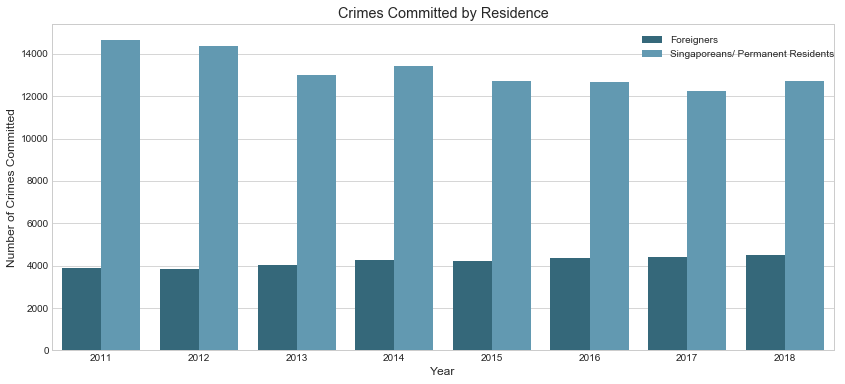

In [632]:
#omg,please use thisss
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x='Year',y='Number of Crimes Committed',hue='Residence Type',data=crimes_by_residence_df,palette="PuBuGn_d")

plt.title('Crimes Committed by Residence')


plt.legend(loc=[0.75,0.88])




In [633]:
grouped=crimes_by_residence_df.groupby(['Year','Residence Type'])['Number of Crimes Committed'].sum()
grouped.groupby(level=0).apply(lambda x:100*(x/x.sum())).to_frame()

Number of Crimes Committed
Year Residence Type                                               
2011 Foreigners                                          20.974085
     Singaporeans/ Permanent Residents                   79.025915
2012 Foreigners                                          21.146364
     Singaporeans/ Permanent Residents                   78.853636
2013 Foreigners                                          23.632514
     Singaporeans/ Permanent Residents                   76.367486
2014 Foreigners                                          24.221179
     Singaporeans/ Permanent Residents                   75.778821
2015 Foreigners                                          25.022151
     Singaporeans/ Permanent Residents                   74.977849
2016 Foreigners                                          25.527786
     Singaporeans/ Permanent Residents                   74.472214
2017 Foreigners                                          26.478721
     Singaporeans/ Permanent Residents                   73.521279
2018 Foreigners                                          26.068525
     Singaporeans/ Permanent Residents                   73.931475

<b> Observation: </b>

From the above aggregation, there has been a 6% increase in crimes committed by foreigners from 2011 to 2018, though the overall number is kept at a minimum. We should also take into consideration that the foreign population
in Singapore has been increasing. With an increase in foreign population, the crimes have also been increasing



<h3> Arrest Rate based on Residential Status in 2018 </h3>

In [634]:
round((grouped.to_frame()['Number of Crimes Committed']/5639000)*100000,2).loc['2018']



Residence Type
Foreigners                            79.61
Singaporeans/ Permanent Residents    225.77
Name: Number of Crimes Committed, dtype: float64

<h2> National Average Arrest Rate </h2>

In [635]:
np.round((sum(top_10_arrests_2018['Number of Offences'])/5639000)*100000,2)

89.22

<b> Observation: </b>

From the above analysis, we can observe that the arrest rate for Foreigners is less than the national average 
which is 89.22. While the arrest rate for the local population is more than twice of it. This allows us to make
an assumption that unlike other countries in the world where migrants are a threat to national safety and security, it is not the case in Singapore. 

We can assume the reasons to be:
    
1) <b> Strict screening process to enter Singapore </b> on a working visa. Ministry of Manpower of Ministry of Home Affairs
   have a strict visa screening process though the intricacies are not shared with public. Singapore is always        working on making a safer environment. Even one example where 16 foreigners were deported after supporting
   the slashing of a French teacher in France. The authorities found that these individuals share content on          social media supporting extremeism. This does give us an idea of how vigilant safety and security is taken in Singapore (ChannelNewsAsia, 2020).

2) <b> Severe penalties imposed </b>. Singapore is also known as a 'fine city' not only describing it to be a beautiful,fine city but a city where one will be fined easily from drinking in metros to littering to carrying durians in public transportation. Foreigners on a work pass in Singapore are briefed on rules and regulations in the declaration forms they sign


However, we do not have data to analyse the different types of crimes that are committed by locals/foreigners. This data could in turn provide us with a clearer picture on areas to target to keep the population safer.

<h3> So far.... </h3>

We looked into crime classification by gender and how the crime rates changed over the past few years. We also did
observe more women committing crimes.We noticed that there have been a high rate of cheating cases which are now currently 
a problem for the authorities. We did look into crime rates by residential status.


With that said, we have answered what (crimes) and who(gender/residential status) but where do majority of the
crimes occur in Singapore. Is there a specific place with a higher rate of crime than the rest of the country?

We will now dwelve into geospatial analysis



<h2> Geospatial Analysis </h2>

In [2]:
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy

import leaflet

In [ ]:
#install these packages

!pip install geocoder
!pip install geopy
!pip install leaflet

In [3]:
# a map of Singapore

sg_map=folium.Map(location=[1.38, 103.8],zoom_start=10.5,tiles='cartodbpositron')
sg_map

We have obtained an additional dataset from which has Neighbourhoods and Crimes committed in 2016 and crime rate
from 2012 to 2016

https://goodyfeed.com/the-safest-most-dangerous-neighbourhoods-in-spore-based-on-number-of-crimes-reported/


    

In [4]:
neighbourhood_safety=pd.read_csv('../additional crime dataset/DATA.csv',header=None)
neighbourhood_safety.columns=['Rank','Neighbourhood','Number of Crimes in 2016','Average Number of Crimes (2012 - 2016)']

In [5]:
#Neighbourhoods and their crime rates

neighbourhood_safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Rank                                    35 non-null     int64  
 1   Neighbourhood                           35 non-null     object 
 2   Number of Crimes in 2016                35 non-null     int64  
 3   Average Number of Crimes (2012 - 2016)  35 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


In [6]:
neighbourhood_safety.groupby(['Neighbourhood']).sum()['Average Number of Crimes (2012 - 2016)'].reset_index()

,Neighbourhood,Average Number of Crimes (2012 - 2016)
0,Ang Mo Kio North,283.6
1,Ang Mo Kio South,233.6
2,Bedok North,420.8
3,Bedok South,190.0
4,Bishan,127.8
5,Bukit Batok,332.0
6,Bukit Merah East,260.8
7,Bukit Merah West,212.2
8,Bukit Panjang,304.2
9,Bukit Timah,69.4


In [7]:
#converting the Number of Crimes in 201 to float from int

neighbourhood_safety['Number of Crimes in 2016']=neighbourhood_safety['Number of Crimes in 2016'].astype('float')

In [8]:
neighbourhood_safety_2=neighbourhood_safety[['Neighbourhood','Number of Crimes in 2016']]

In [9]:
#creating plugins

plugins.Fullscreen(position='topright',title='Crime Classification',title_cancel='Singapore',
                  force_separate_button=True).add_to(sg_map)

In [10]:
import json
with open('map4.geojson') as f:
    geojson_sg=json.load(f)

In [11]:
geojson_sg

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'stroke': '#555555',
    'stroke-width': 2,
    'stroke-opacity': 1,
    'fill': '#555555',
    'fill-opacity': 0.5,
    'Name ': '',
    'Name': 'Woodlands West'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[103.69102478027344, 1.4332230073518357],
      [103.70441436767578, 1.4239561742738192],
      [103.70235443115233, 1.416748611665172],
      [103.70784759521484, 1.4150325220203819],
      [103.71711730957031, 1.416748611665172],
      [103.73222351074219, 1.416748611665172],
      [103.74080657958984, 1.4201807871396008],
      [103.74320983886719, 1.4095410266324695],
      [103.75282287597656, 1.4043927379432284],
      [103.75419616699219, 1.392380020302357],
      [103.76312255859375, 1.3865452496126591],
      [103.78543853759766, 1.3865452496126591],
      [103.79642486572264, 1.3879181381298884],
      [103.79711151123047, 1.3951257897508365],
      [103.80397796630858, 1.396841

In [12]:
for i in geojson_sg['features']:
    
    i['id']=i['properties']['Name']
    
    print(i['id'])
    
    
#this is an important feature for our data to match

Woodlands West
Woodlands East
Sembawang
Yishun North
Yishun South
Bukit Panjang
Bukit Batok
Jurong East
Clementi
Queenstown
Bukit Merah West
Bukit Merah East
Orchard
Marina Bay
Marine Parade
Toa Payoh
Serangoon
Punggol
Sengkang
Rocher
Geylang
Jurong West
Choa Chu Kang
Nanyang
Pasir Ris
Bukit Timah
Kampong Jave
Bishan
Ang Mo Kio South
Ang Mo Kio North
Hougang
Tampines
Changi
Bedok South
Bedok North


In [13]:
import json

with open('map5.geojson') as f:
    geojson_sg=json.load(f)
    
    
for i in geojson_sg['features']:
    
    i['id']=i['properties']['Names']  #we do need a matching id to merge our dataframe and geojson file it is 
                                      # the names of Areas in Singapore


folium.Choropleth(geo_data=geojson_sg,
                name='choropleth',
                data=neighbourhood_safety_2,
                columns=['Neighbourhood','Number of Crimes in 2016'],
                key_on='feature.id',
                 fill_color='YlOrRd',
                 fill_opacity=0.66,
                 line_opacity=0.5,
                 legend_name='Crime rate',
                highlight=True
                ).add_to(sg_map)


folium.LayerControl().add_to(sg_map)

sg_map

In [17]:
neighbourhood_safety_2=neighbourhood_safety[['Neighbourhood','Number of Crimes in 2016']]


#creating a new dataframe to obtain columns of interest

In [18]:
import os
neighbourhood_safety_2['Neighbourhood'] = neighbourhood_safety_2['Neighbourhood'].astype('str')
vis='map5.geojson' #our geojson file
m = folium.Map(location = [1.38, 103.8], zoom_start = 11, tiles = "cartodbpositron")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
m.choropleth(geo_data=vis, 
             data = neighbourhood_safety_2,
             columns = ['Neighbourhood','Number of Crimes in 2016'], 
             fill_color = 'YlGn', 
             key_on = 'feature.properties.Names')

folium.LayerControl().add_to(m)

m

<b> Methodology </b>

1) We will start by creating our own Singapore boundary at using a geojson file since the dataset found online was not compatible.
  
2) folium.Choropleth is used to visualize the graph. We also define Singapore's
latitudes and longitudes to plot the map

3) The key on feature used is the names of Neighbourhood 
    


In [20]:
#conversion to str

neighbourhood_safety.Neighbourhood=neighbourhood_safety.Neighbourhood.map(str)

<b> We will now construct another folium map to plot based on latitude and longitudes </b>

In [21]:
neighbourhood_safety.sort_values(by=['Number of Crimes in 2016'],ascending=False)

,Rank,Neighbourhood,Number of Crimes in 2016,Average Number of Crimes (2012 - 2016)
34,35,Yishun North,284.0,327.6
33,34,Nanyang,280.0,456.4
32,33,Jurong West,275.0,391.0
31,32,Tampines,266.0,449.8
30,31,Woodlands East,259.0,430.4
29,30,Choa Chu Kang,245.0,385.6
28,29,Geylang,232.0,363.6
27,28,Hougang,232.0,454.8
26,27,Bedok North,227.0,420.8
25,26,Sengkang,227.0,357.2


In [22]:
bukit_timah=geocoder.osm('Bukit Timah, Singapore')
bishan=geocoder.osm('Bishan, Singapore')
Kampong_Java=geocoder.osm('Kampong Java, Singapore')
Marine_Parade=geocoder.osm('Marine Parade, Singapore')
Sembawang=geocoder.osm('Sembawang, Singapore')
Marina_Bay=geocoder.osm('Marina Bay, Singapore')
Serangoon=geocoder.osm('Serangoon, Singapore')
Changi=geocoder.osm('Changi, Singapore')
Bedok_South=geocoder.osm('Bedok South, Singapore')
Queenstown=geocoder.osm('Queenstown, Singapore')
Queenstown



<[OK] Osm - Geocode [Queenstown, 301, Commonwealth Avenue, Queenstown, Singapore, Central, 149729, Singapore]>

In [23]:
Bukit_Merah_West=geocoder.osm('Bukit Merah West, Singapore')
Punggol=geocoder.osm('Punggol, Singapore')
Jurong_East=geocoder.osm('Jurong East, Singapore')
Ang_Mo_Kio_South=geocoder.osm('Ang Mo Kio South, Singapore')
Orchard=geocoder.osm('Orchard, Singapore')
Pasir_Ris=geocoder.osm('Pasir Ris, Singapore')
Bukit_Merah_East=geocoder.osm('Bukit Merah East, Singapore')
Rocher=geocoder.osm('Rocher, Singapore')
Clementi=geocoder.osm('Clementi, Singapore')
Yishun_South=geocoder.osm('Yishun South, Singapore')
Toa_Payoh=geocoder.osm('Toa Payoh, Singapore')
Ang_Mo_Kio_North=geocoder.osm('Ang Mo Kio North, Singapore')
Bukit_Panjang=geocoder.osm('Bukit Panjang, Singapore')
Woodlands_West=geocoder.osm('Woodlands West, Singapore')

In [24]:
Bukit_Batok=geocoder.osm('Bukit Batok, Singapore') #done
Sengkang=geocoder.osm('Sengkang, Singapore') #done
Bedok_North=geocoder.osm('Bedok North, Singapore') #done
Hougang=geocoder.osm('Hougang, Singapore') #done
Geylang=geocoder.osm('Geylang, Singapore')#
Choa_Chu_Kang=geocoder.osm('Choa Chu Kang, Singapore') #done
Woodlands_East=geocoder.osm('Woodlands East, Singapore') #done
Tampines=geocoder.osm('Tampines, Singapore') #done
Jurong_West=geocoder.osm('Jurong West, Singapore') #done
Nanyang=geocoder.osm('Tuas, Singapore')#done
Yishun_North=geocoder.osm('Yishun North, Singapore')

We will create a list to store the latitudes and longitudes of each areas

In [25]:
bukit_timah_latlng = [bukit_timah.lat, bukit_timah.lng, 51]
bishan_latlng=[bishan.lat,bishan.lng,71]
Kampong_Java_latlng=[Kampong_Java.lat,Kampong_Java.lng,76]
Choa_Chu_Kang_latlng=[Choa_Chu_Kang.lat,Choa_Chu_Kang.lng,245]
Marine_Parade_latlng=[Marine_Parade.lat,Marine_Parade.lng,80]
Sembawang_latlng=[Sembawang.lat,Sembawang.lng,83]
Marina_Bay_latlng=[Marina_Bay.lat,Marina_Bay.lng,96]
Serangoon_latlng=[Serangoon.lat,Serangoon.lng,105]
Changi_latlng=[Changi.lat,Changi.lng,108]
Bedok_South_latlng=[Bedok_South.lat,Bedok_South.lng,111]
Queenstown_latlng=[Queenstown.lat,Queenstown.lng,122]
Bukit_Merah_West_latlng=[Bukit_Merah_West.lat,Bukit_Merah_West.lng,125]
Punggol_latlng=[Punggol.lat,Punggol.lng,131]
Jurong_East_latlng=[Jurong_East.lat,Jurong_East.lng,132]
Ang_Mo_Kio_South_latlng=[Ang_Mo_Kio_South.lat,Ang_Mo_Kio_South.lng,134]
Orchard_latlng=[Orchard.lat,Orchard.lng,139]
Pasir_Ris_latlng=[Pasir_Ris.lat,Pasir_Ris.lng,139]
Bukit_Merah_East_latlng=[Bukit_Merah_East.lat,Bukit_Merah_East.lng,140]
Rocher_latlng=[Rocher.lat,Rocher.lng,141]
Clementi_latlng=[Clementi.lat,Clementi.lng,144]
Yishun_South_latlng=[Yishun_South.lat,Yishun_South.lng,145]
Toa_Payoh_latlng=[Toa_Payoh.lat,Toa_Payoh.lng,161]
Ang_Mo_Kio_North_latlng=[Ang_Mo_Kio_North.lat,Ang_Mo_Kio_North.lng,178]
Bukit_Panjang_latlng=[Bukit_Panjang.lat,Bukit_Panjang.lng,200]
Woodlands_West_latlng=[Woodlands_West.lat,Woodlands_West.lng,202]
Bukit_Batok_latlng=[Bukit_Batok.lat,Bukit_Batok.lng,205]
Jurong_West_latlng=[Jurong_West.lat,Jurong_West.lng,275]

Woodlands_East_latlng=[Woodlands_East.lat,Woodlands_East.lng,259]
Sengkang_latlng=[Sengkang.lat,Sengkang.lng,227]
Bedok_North_latlng=[Bedok_North.lat,Bedok_North.lng,227]
Hougang_latlng=[Hougang.lat,Hougang.lng,232]
Geylang_latlng=[Geylang.lat,Geylang.lng,232]
Tampines_latlng=[Tampines.lat,Tampines.lng,266]
Yishun_North_latlng=[Yishun_North.lat,Yishun_North.lng,284]
Nanyang_latlng=[Nanyang.lat,Nanyang.lng,280]

areas=[bukit_timah_latlng,bishan_latlng,Choa_Chu_Kang_latlng,
      Marine_Parade_latlng,Sembawang_latlng,Marina_Bay_latlng,Serangoon_latlng,Changi_latlng,
      Bedok_South_latlng,Queenstown_latlng,Bukit_Merah_West_latlng,Punggol_latlng,
       Jurong_East_latlng,Ang_Mo_Kio_South_latlng,Orchard_latlng,Pasir_Ris_latlng,
       Bukit_Merah_East_latlng,Rocher_latlng,Clementi_latlng,
       Toa_Payoh_latlng,Ang_Mo_Kio_North_latlng,Bukit_Panjang_latlng,
       Bukit_Batok_latlng,Jurong_West_latlng,Woodlands_East_latlng,
       Sengkang_latlng,Bedok_North_latlng,Hougang_latlng,Geylang_latlng,Tampines_latlng,Yishun_North_latlng,
       Yishun_South_latlng,Woodlands_West_latlng,Nanyang_latlng
      ]
areas

[[1.3546901, 103.7763724, 51],
 [1.3509859, 103.84825507492937, 71],
 [1.3847493, 103.7445341, 245],
 [1.3026889, 103.9073952, 80],
 [1.4490928, 103.8200555, 83],
 [1.2755589999999999, 103.85489740049655, 96],
 [1.3497610500000001, 103.87368414801405, 105],
 [1.35107955, 103.99006409583149, 108],
 [1.3172941, 103.94968140811523, 111],
 [1.2946226, 103.8060366, 122],
 [1.2704395, 103.82831840176756, 125],
 [1.40519735, 103.90234976571602, 131],
 [1.333108, 103.7422939, 132],
 [1.3525265, 103.8571135, 134],
 [1.3034265999999999, 103.83134195570693, 139],
 [1.3730307, 103.949255, 139],
 [1.2704395, 103.82831840176756, 140],
 [1.3002063, 103.8558555, 141],
 [1.3151003, 103.7652311, 144],
 [1.3353906, 103.8497414, 161],
 [1.3681304, 103.8607491, 178],
 [1.3791486, 103.76141301431002, 200],
 [1.3490572, 103.7495906, 205],
 [1.3396365, 103.7073387, 275],
 [1.436897, 103.786216, 259],
 [1.3919236499999998, 103.89549093760694, 227],
 [1.3344768, 103.91828105834635, 227],
 [1.3708011, 103.892544

In [26]:
singapore_map=folium.Map(location=[1.38, 103.8],zoom_start=10.5,tiles='cartodbpositron') 

plugins.HeatMap(areas,radius=25,blur=3,overlay=False,max_val=3,gradient={ 0.2: 'yellow',0.5: 'blue', 0.7: 'orange', 1: 'red'}).add_to(singapore_map)
singapore_map



<b> Methodology </b>

To plot crime areas, latitudes and longitudes of areas are needed. We has perform manual coding due to the lack of resources available on geospatial analysis in Singapore on crimes. This could be complicated if we were to plot hotspots for 100 plus locations. Howeverm since there are only 25 administrative boundaries in Singapore, this was easily done

<b> Observations from the Geospatial Analysis </b>

The above visualization shows us certain hotspots of crimes in Singapore in 2016. The darker the
bubble, the higher the crime rates are. 

We can observe that along with the northern, western areas, mid regions of Singapore reported higher rates of
crimes in 2016

<b> Assumptions </b>

<b> North: </b>


We do note that Yishun and Woodlands, are two of Singapore's notable crime-worthy areas. There are memes
found which describes woodlands as a place to explore for its peculiarities.

<img src='meme.jpg' width=300> source: Mothershipsg


Woodlands is located nearer to Malaysia than the East Coast. It is also noted that this could indicate a higher crime rate as offenders can escape to Malaysia any event of any serious crimes. Contraband is illegal in Singapore and it is to note that drugs are usually smuggled via Malaysia. Perhaps, syndicates in Singapore could be clustered together for faster delivery of drugs. However, our dataset does not deal with drug related crimes in Singapore.

<b> Central: </b>

The central area of Singapore is home to some of the busiest shopping malls and places. Town areas are also
crowded than the heartlands of Singapore. Traveling to central locations at peak hours leads to delays and heavy
traffic. This could also lead to petty crimes where people can take advantage of the crowds and people's restlessness to get to the next place

<b> East Coast (Marina Bay) and Bukit Timah: </b>

East Coast of Singapore and Bukit Timah recorded low numbers of crimes. These two areas are known to be a residential hub for rich and wealthy with high property prices and few of Singapore's elite schools located. 


Along with power, another motivator for crime is Money. People usually resort to crime due to financial instability. It is generally known that poorer neighbourhoods around the world tend of high crime rates and it is evident from statistics. Singapore's expensive residential areas are also home to some of the most prominent figures of the country. Another assumption could be that with high vigilance and security, people who intend to commit crimes do not try to enter these areas for the fear of facing serious repercussions


<h2> A look into Preventable Crimes in Singapore </h2>

In [27]:
preventable_crime=pd.read_csv('../additional crime dataset/five-preventable-crime-cases-recorded-by-offence-npc.csv')

preventable_crime.rename(columns={'year':'Year','level_1':'Division','level_2':'Type of Crime','value':'Number of Crimes'},inplace=True)


In [28]:
preventable_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              1920 non-null   int64 
 1   Division          1920 non-null   object
 2   Type of Crime     1920 non-null   object
 3   Number of Crimes  1920 non-null   object
dtypes: int64(1), object(3)
memory usage: 60.1+ KB


In [ ]:
#creating a dictionary to reuse it later for another edited,heatmap

In [29]:
def cleaning(preventable_crime):
    preventable_crime.rename(columns={'year':'Year','level_1':'Division','level_2':'Type of Crime','value':'Number of Crimes'},inplace=True)
    #preventable_crime.Year=pd.to_datetime(preventable_crime.Year,format='%Y').dt.strftime('%Y')
    preventable_crime['Number of Crimes']=preventable_crime['Number of Crimes'].replace('na',np.nan)
    preventable_crime.dropna(inplace=True)
    preventable_crime['Number of Crimes']=preventable_crime['Number of Crimes'].replace('-',0)
    preventable_crime['Number of Crimes']=preventable_crime['Number of Crimes'].map(int)
    preventable_crime=preventable_crime[preventable_crime.Year==2018]
    preventable_crime[['Extra','Area']]=preventable_crime.Division.str.split('-',expand=True)
    preventable_crime.Area=preventable_crime.Area.str.replace('NPC','')
    
    return preventable_crime
    

In [30]:
preventable_crime=cleaning(preventable_crime)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
preventable_crime=preventable_crime.drop(preventable_crime.loc[1680:1684].index)
preventable_crime.reset_index(inplace=True)

In [32]:
preventable_crime.head()

,index,Year,Division,Type of Crime,Number of Crimes,Extra,Area
0,1685,2018,Central Police Division - Bukit Merah East NPC,Robbery,2,Central Police Division,Bukit Merah East
1,1686,2018,Central Police Division - Bukit Merah East NPC,Housebreaking,12,Central Police Division,Bukit Merah East
2,1687,2018,Central Police Division - Bukit Merah East NPC,Snatch Theft,8,Central Police Division,Bukit Merah East
3,1688,2018,Central Police Division - Bukit Merah East NPC,Theft Of Motor Vehicle,1,Central Police Division,Bukit Merah East
4,1689,2018,Central Police Division - Bukit Merah East NPC,Outrage Of Modesty,74,Central Police Division,Bukit Merah East


In [33]:
def heatmap_plot(preventable_crime):
    
    preventable_crime=preventable_crime[['Area','Type of Crime','Number of Crimes']]
    xyz=preventable_crime.groupby(['Area','Type of Crime']).sum()['Number of Crimes'].to_frame()
    xyz.reset_index(inplace=True)
    xyz=xyz[(xyz['Area']==' Yishun South ') | (xyz['Area']==' Jurong West ')| (xyz['Area']==' Nanyang ') | (xyz['Area']==' Tampines ')| (xyz['Area']==' Bukit Timah ')|(xyz['Area']==' Woodlands East ')|(xyz['Area']==' Woodlands West ')|(xyz['Area']==' Marina Bay ')|(xyz['Area']==' Orchard ')|(xyz['Area']==' Bishan ')]
    

    plt.figure(figsize=(16,10))
    plt.title('Visualization of Crimes in Specific Areas in 2018')

    return sns.heatmap(xyz.pivot('Type of Crime','Area','Number of Crimes'),vmax=150,annot=True,fmt='d',cmap='RdYlGn')

    
    
    

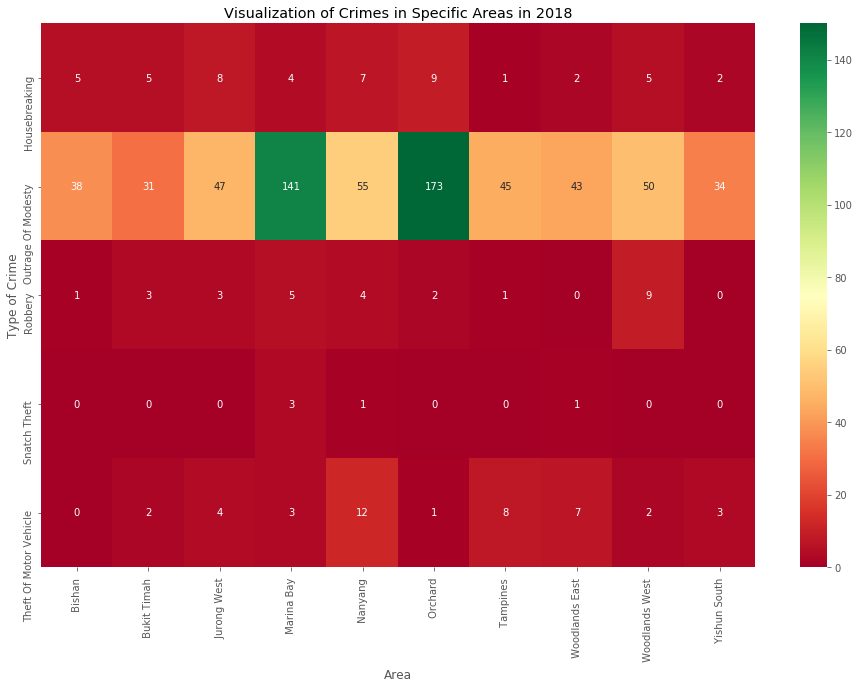

In [34]:
heatmap_plot(preventable_crime) #use the dictionary create a heatmap

<b> We have now observed and pinpointed areas of high preventable crimes and now we will observe a few places
and dwelve into the different types of crimes and check if our assumption is true </b>
    

<b> Observation </b>

Frome analysing the data, we do observe something. High crime rate of outrage of modesty in Orchard and Marina Bay. Though
Orchard and Marina Bay have had relatively fewer crime rates in 2016, they have disproportionately high crime rate of outrage
of modesty in 2018. A reason for it could be that Orchard and Marina Bay are two of Singapore's busiest places with the former
known as Singapore's shopping hub. It could be that perpertrators could take advantage of crowds in these areas and molest/assault women/men

We have earlier assumed that central areas of Singapore are always bustling with crowds and this could be reason
for such crimes to occur in these areas. It is usually hard to locate criminals in a busy environment

Another observation is Marina Bay. It is located in the Eastern part of Singapore and previously from our folium map, the eastern region is said to have low crimes but after analysing the dataset, we do note that there are high rates of 'outrage of modesty' crimes in Marina Bay. 

<b> Areas of Concern </b>

We also do have to note that from our previous data, we were missing 'Cheating & Related' cases and 'Serious Hurt'.
We could not make final conclusions from the above heatmap. The above heatmap is insufficient in quantifying
other crimes of Singapore.

After some research, I came across this dataset on unlicensed moneylending and harrassment cases from gov.sg. It is to note that these cases are not combined with the general crime dataset and are found individually. These datasets could provide us with a better interpretation of crimes throughout the island

In [35]:
#reading of dataset

moneylending_harrasement=pd.read_csv('../additional crime dataset/unlicensed-moneylending-cases-and-harassment-by-neighbourhood-police-centre-npc.csv')

In [36]:
moneylending_harrasement=cleaning(moneylending_harrasement) #applying cleaning dictionary created
moneylending_harrasement

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Year,Division,Type of Crime,Number of Crimes,Extra,Area
672,2018,Central Police Division - Total,Unlicensed Moneylending,62,Central Police Division,Total
673,2018,Central Police Division - Total,Harassment,168,Central Police Division,Total
674,2018,Central Police Division - Bukit Merah East NPC,Unlicensed Moneylending,50,Central Police Division,Bukit Merah East
675,2018,Central Police Division - Bukit Merah East NPC,Harassment,75,Central Police Division,Bukit Merah East
676,2018,Central Police Division - Marina Bay NPC,Unlicensed Moneylending,0,Central Police Division,Marina Bay
...,...,...,...,...,...,...
763,2018,Woodlands Police Division - Yishun North NPC,Harassment,36,Woodlands Police Division,Yishun North
764,2018,Woodlands Police Division - Yishun South NPC,Unlicensed Moneylending,0,Woodlands Police Division,Yishun South
765,2018,Woodlands Police Division - Yishun South NPC,Harassment,19,Woodlands Police Division,Yishun South
766,2018,Woodlands Police Division - Sembawang NPC,Unlicensed Moneylending,0,Woodlands Police Division,Sembawang


In [37]:

moneylending_harrasement=moneylending_harrasement.drop(moneylending_harrasement.iloc[0:2].index).reset_index().drop(columns=['index'])

In [38]:
moneylending_harrasement

,Year,Division,Type of Crime,Number of Crimes,Extra,Area
0,2018,Central Police Division - Bukit Merah East NPC,Unlicensed Moneylending,50,Central Police Division,Bukit Merah East
1,2018,Central Police Division - Bukit Merah East NPC,Harassment,75,Central Police Division,Bukit Merah East
2,2018,Central Police Division - Marina Bay NPC,Unlicensed Moneylending,0,Central Police Division,Marina Bay
3,2018,Central Police Division - Marina Bay NPC,Harassment,26,Central Police Division,Marina Bay
4,2018,Central Police Division - Rochor NPC,Unlicensed Moneylending,12,Central Police Division,Rochor
...,...,...,...,...,...,...
87,2018,Woodlands Police Division - Yishun North NPC,Harassment,36,Woodlands Police Division,Yishun North
88,2018,Woodlands Police Division - Yishun South NPC,Unlicensed Moneylending,0,Woodlands Police Division,Yishun South
89,2018,Woodlands Police Division - Yishun South NPC,Harassment,19,Woodlands Police Division,Yishun South
90,2018,Woodlands Police Division - Sembawang NPC,Unlicensed Moneylending,0,Woodlands Police Division,Sembawang


In [39]:
concat_2018_crimes=pd.concat([preventable_crime,moneylending_harrasement],axis=0).reset_index().drop(columns=['level_0'])

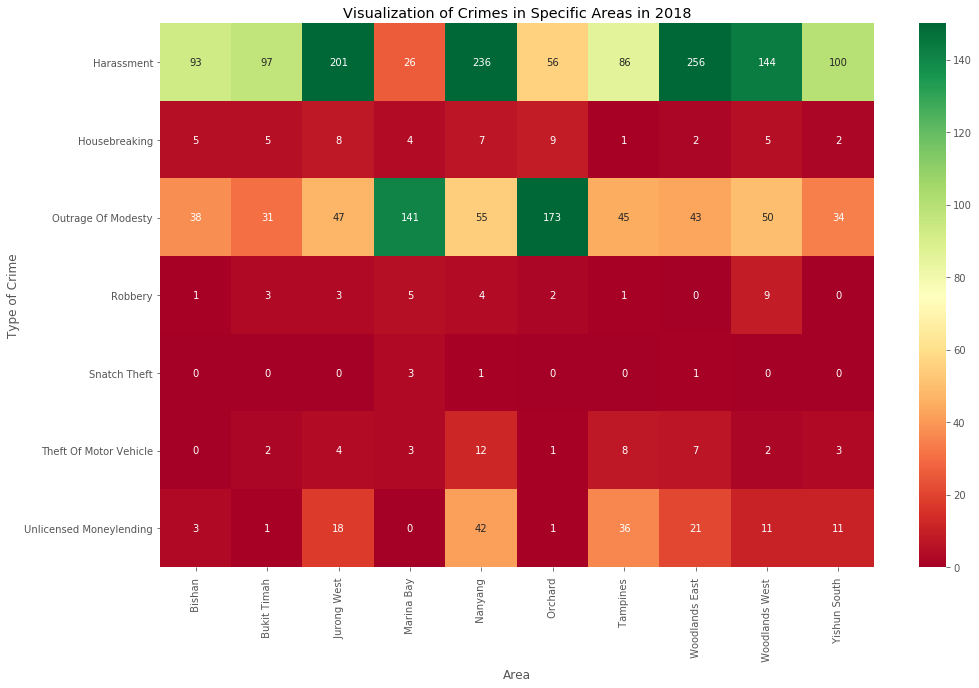

In [40]:
heatmap_plot(concat_2018_crimes)  #we will use this function created to save time of execution

<b> Observation </b>


From this visualization, we can clearly observe how areas such as Yishun, woodlands and Jurong West which recorded
a high crime in rate 2016 have high cases of harrasement and unlicensed moneylending in 2018. Even 'safe neighbourhoods' such as Bukit Timah ranked the safest neighbourhood recorded 97 cases of harrasement. This come to 
Singapore Police Force's famous slogan, "Low Crime does not mean no crime".

"Deemed safe" neighbourhoods such as Bukit Timah, Marina Bay recorded slighly high crime cases shows that no place
in Singapore is free from crime. We made an assumption that safer neighbourhoods recorded lower rates of crime due to influential politicians residing there. However, these areas have recorded high number of cases such as harrasement and outrage of modesty.


<b> Limitations of Our Project </b>



* We were unable to quantify cheating and related cases via a heatmap as we do not have sufficient information regarding the crime happenings. Most cheating and related cases occur online via scams and it would be unreasonable to indicate that the areas is prone to cheating crimes. 
<br>

* Another limitation would be good breakdown of different kinds of cheating or related crimes to pinpoint areas of concern. There are information related to scams available but not much information on how many percentage of cheating cases do scams come under. The government has not released accurate data but there have been summaries released by the government with percentage breakdown. These could not render useful for us to draw conclusions
from data analysis
<br>

* There is also confusion when it comes to classfiying crimes. Certain government datasets include commercial crimes but there is no proper definition on what constitutes a commercial crime. This could enable people working on the data to classify and concat datasets approriately.
<br>

* Finally, the visualisation gives only a vague idea of crime hotspots but it does provide any relevant information on crimes in planning areas. Are there recurring crimes in any one neighbourhood? Could it be due to lack of police patrolling or CCTVs. There are many more avenues to ponder has their more data collected.
<br>
However, overall the data does provide us with areas of specific concern. Authorities do know areas to increase
patrolling and vigilance. As mentioned above, if crimes per neighbourhood were released, we could map a clearer
folium map with intricate patterns

<h2> Final Conclusions </h2>

1) Though crimes in Singapore are kept low, there has been a steady increase in crime rate overall. 

2) Cheating & Related and Outrage of Modesty crimes are two crimes of concern with one having a 27% rate of arrest
and the other recording increasing numbers of police report. Miscellaneous crimes and serious property crimes, though part of the top 5 crimes overall, are not crimes in concern in 2018.

3) Foreigners in Singapore, overall, do not pose a threat to the safety and security of Singapore with with 26% of offences committed in 2018 as compared to the 20% in in 2008.

4) More women are actively committing crimes in Singapore, though the numbers are relatively low. Another observation would be women arrested for incidents related to outrage of modesty. With the #meetoo movement and more awareness on social media, it is evident that women could also commit sexual-related offences

5) From our geospatial analysis, we observed trends of high crimes in West, north and central regions. However, despite being ranked number 1 in terms of safety according to Goofyfeed, there have been a high number of outrage of modesty cases reported. This allows us to conclude that even if an area is safe, it could record particular high crimes

6) In the beginning, We did notice theft and related crimes constituted the highest overall crimes over the past 10 years but were contantly decreasing. After conducting this analysis, we could assume that people have migrated to other forms of crimes with high valuation such as cheating & related (given the SGD 168 million online scam from ChannelNewsAsia reports). This could help with further research should Singapore government classify commerical crimes/online scams and cheating & related crimes.  

<h2> References </h2>

Zhang, L. (2020, November 24). 37 people investigated, 16 foreigners deported in wake of recent terror attacks abroad: MHA. Retrieved December 20, 2020, from https://www.straitstimes.com/singapore/37-people-investigated-16-foreigners-deported-in-wake-of-recent-terror-attacks-abroad-mha

Mahmud, A. (2020, February 05). Why scam cases continue to rise and what is being done about them. Retrieved December 20, 2020, from https://www.channelnewsasia.com/news/singapore/singapore-scam-cases-on-the-rise-crime-rate-12395936

Intentional homicides (per 100,000 people). (n.d.). Retrieved December 20, 2020, from https://data.worldbank.org/indicator/VC.IHR.PSRC.P5

Kok, L. (2017, September 06). 14.2% drop in youth arrests in 1st half of 2017, but more nabbed for shop theft and carrying weapons: Police. Retrieved December 20, 2020, from https://www.straitstimes.com/singapore/courts-crime/142-drop-in-youth-arrests-in-1st-half-of-2017-but-more-nabbed-for-shop-theft

V. (Ed.). (2018, July 26). The Safest &amp; 'Most Dangerous' Neighbourhoods in S'pore Based on Number of Crimes Reported. Retrieved December 20, 2020, from https://goodyfeed.com/the-safest-most-dangerous-neighbourhoods-in-spore-based-on-number-of-crimes-reported/